## Frame the Problem and Big Picture

**Client Background:**
- Our client, FinSight Analytics, is a financial risk assessment consultancy that provides services to major investment firms, banks, and private equity companies across North America. They've approached Team Gort to develop a more effective bankruptcy prediction model that their analysts can use to assess investment and lending risks.

**1. Define the objective in business terms:**
- The objective is to develop a bankruptcy prediction model that reduces financial risk exposure for FinSight Analytics' clients by identifying companies at high risk of bankruptcy before it occurs. This will enable clients to protect their investments, adjust lending terms, or avoid high-risk engagements altogether, ultimately preventing significant financial losses.

**2. How will your solution be used?**
- This model will be used by financial institutions (banks, investment firms, and creditors) to assess the bankruptcy risk of companies they're considering investing in or extending credit to. It will serve as an early warning system, allowing these stakeholders to make more informed decisions, adjust lending terms based on risk profiles, implement early intervention strategies, and optimize their portfolio management.

**3. What are the current solutions/workarounds (if any)?**
- Currently, financial institutions rely on traditional credit scoring models and manual analysis by financial analysts. These approaches often fail to detect early warning signs of bankruptcy and tend to over-rely on limited metrics like payment history and debt ratios while overlooking other critical financial indicators.

**4. How should you frame this problem?**
- This is a supervised binary classification problem since we are trying to predict whether a company will go bankrupt (1) or not (0) based on historical financial data. This would be a batch learning solution that gets periodically updated as new financial data becomes available, though predictions would be generated whenever a new company needs to be evaluated.

**5. How should performance be measured? Is the performance measure aligned with the business objective?**
- Our objective is to be able to predict at least 75% of the companies that will go bankrupt while maintaining a false positive rate below 15%. This aligns with our business objective since missing a bankruptcy prediction can result in significant financial losses, while incorrectly flagging healthy companies can lead to missed business opportunities.

- **False negatives (missing bankruptcies)**: Each missed bankruptcy prediction could cost clients millions in unrecoverable investments.

**6. What would be the minimum performance needed to reach the business objective?**
- The minimum performance needed would be the ability to correctly identify at least 75% of companies that will go bankrupt, with a false positive rate below 15%, and provide predictions at least 12 months before bankruptcy occurs.

**7. What are comparable problems? Can you reuse experience or tools?**
- This problem is comparable to other financial risk assessment problems such as credit default prediction and loan delinquency prediction. We can leverage our experience with classification algorithms like Random Forest, Gradient Boosting, and logistic regression, which have proven effective in similar financial prediction tasks. We can also use techniques from previous projects dealing with imbalanced datasets. Other past machine learning problems we have tackled such as the airline project can contribute to our knowledge of how to navigate a classification problem.

**8. Is human expertise available?**
- No we currently don't have any human expertise at the moment to assist us with this problem but we have been looking for online at people who have worked in this field to seek guidance from things they have shared publicly or if we can eventually get in contact.

**9. How would you solve the problem manually?**
- To solve this problem manually, we would need to analyze the historical financial data of companies that went bankrupt and those that remained solvent. We would look for patterns in financial ratios, identify negative trends in profitability and liquidity, examine cash flow patterns, assess debt structure, and combine these factors to make a risk assessment. We would also need to consider industry-specific benchmarks since financial ratios can vary significantly across different sectors.

**10. List the assumptions you (or others) have made so far. Verify assumptions if possible.**
- We have made the assumption that financial ratios and indicators from company reports are strong predictors of future bankruptcy. We also assume that the relationship between these indicators and bankruptcy risk remains relatively stable over time. Another assumption is that the provided dataset contains sufficient examples of both bankrupt and non-bankrupt companies to train an effective model. We will need to verify these assumptions during our exploratory data analysis phase.


## Get the Data

**1. List the data you need and how much you need**
- Company Bankruptcy Data 

**2. Find and document where you can get that data**
- The data is freely available on Kaggle:
- https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

**3. Get access authorizations**
- You must make a kaggle account to be able to download the data

**4. Create a workspace (with enough storage space)**
- This jupyter notebook

**5. Get the data**
- Download from the link above

**6. Convert the data to a format you can easily manipulate (without changing the data itself)**
- The data is all in a csv file that is easily manipulatable 

**7. Ensure sensitive information is deleted or protected (e.g. anonymized)**
- There is no sensitive data that is stored inside the csv

**8. Check the size and type of data (time series, geographical, ...)**
- Number of rows (instances): 6,819 companies
- Number of columns (features): 96 columns (95 financial indicators + 1 target variable)
- The data is in tabular format with various financial ratios and indicators.
- It is not a time series and does not have geographical data

**9. Sample a test set, put it aside, and never look at it (no data snooping!)**
- Done

In [9]:
# Imports
import numpy as np
import scipy as sp
from scipy.stats import norm
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [10]:
fullData = pd.read_csv('Bankruptcy.csv')

In [10]:
# A quick look at the data showing column names and data types and number of non-null values
fullData.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [11]:
# A brief look at the data
fullData.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [12]:
# Shows the number of columns and rows in the data
fullData.shape

(6819, 96)

In [13]:
# Looking at the proportions of bankrupt and non-bankrupt companies
# 0 = non-bankrupt, 1 = bankrupt
fullData["Bankrupt?"].value_counts() / len(fullData)

Bankrupt?
0    0.967737
1    0.032263
Name: count, dtype: float64

Text(0, 0.5, 'Frequancy')

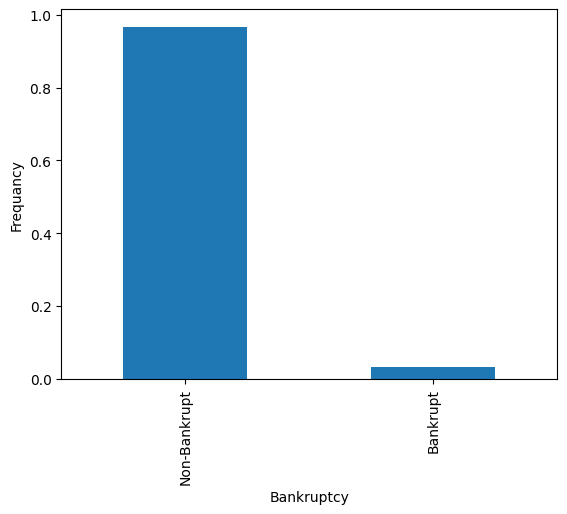

In [14]:
# Visualizing the proportions of bankrupt and non-bankrupt companies
fullData['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankruptcy")
plt.xticks([0, 1], ['Non-Bankrupt', 'Bankrupt'])
plt.ylabel("Frequancy")

In [15]:
# Checks for missing values in the dataset
(fullData.isna().sum() > 0).sum()

np.int64(0)

## Stratification 
There are little instances where (bankrupt? = 1), meaning the company went bankrupt. We are going to have to stratify on this feature so that we have a useful ratio of companies that did and did not go bankrupt

In [11]:
# Separates the training and testing data and stratifies the split based on the Bankrupt? column
def split_data(fullData):
    """
    Split the data into a training and testing set
    """
    return train_test_split(fullData, test_size=0.1, random_state=42, stratify=fullData['Bankrupt?'])

train_set, test_set = split_data(fullData)


In [17]:
def plot_stratification_check(data, target_col, test_size=0.1, random_state=42):
    """
    Plot the distribution of the target variable before and after train-test split,
    with and without stratification.
    
    Args:
        data (pd.DataFrame): Your full dataset
        target_col (str): Name of the target column
        test_size (float): Proportion for test split
        random_state (int): Random state for reproducibility
    """

    X = data.drop(columns=[target_col])
    y = data[target_col]

    # Without stratification
    X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # With stratification
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Prepare distribution DataFrame
    distribution = pd.DataFrame({
        'Original': y.value_counts(normalize=True),
        'Train (no stratify)': y_train_ns.value_counts(normalize=True),
        'Test (no stratify)': y_test_ns.value_counts(normalize=True),
        'Train (stratify)': y_train_s.value_counts(normalize=True),
        'Test (stratify)': y_test_s.value_counts(normalize=True)
    })

    # Plot
    distribution.T.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Comparison of {target_col} Distributions\n(Original vs Train/Test Splits)', fontsize=14)
    plt.ylabel('Proportion of Samples')
    plt.xlabel('Dataset Split')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=target_col, labels=['Class 0', 'Class 1'])
    plt.tight_layout()
    plt.show()

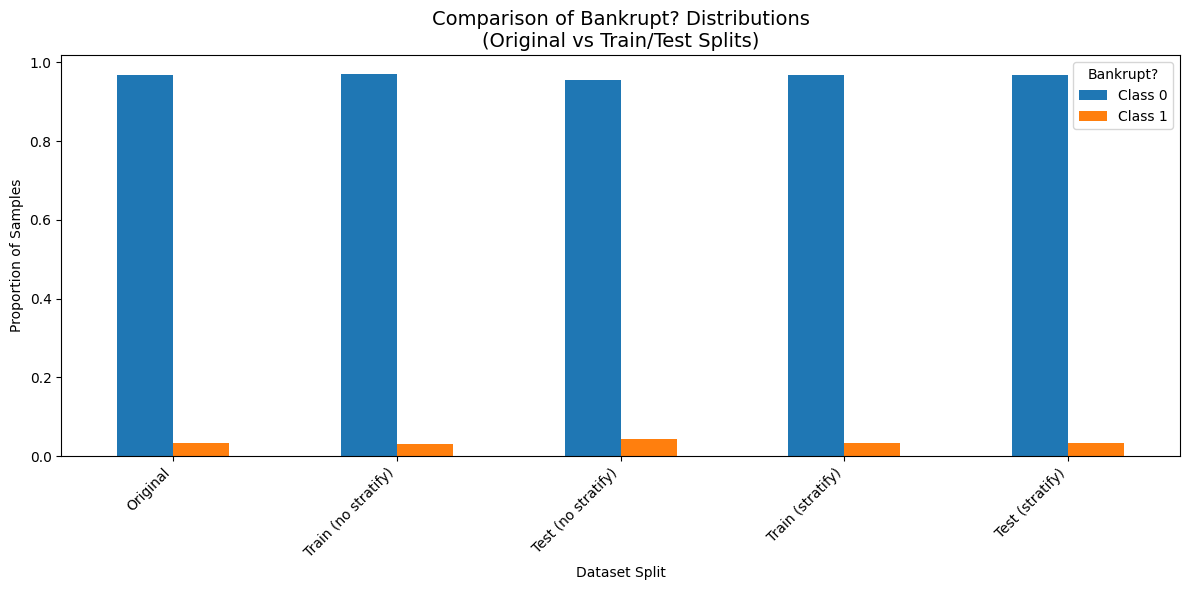

In [18]:
# Assuming your dataset is already loaded into `data`
plot_stratification_check(fullData, target_col='Bankrupt?')

## Explore the data

**1. Copy the data for exploration, downsampling to a manageable size if necessary.**
- We did not downsample, there are about 7000 samples. We split the train and test then keep only the train set, in order to keep memory usage to a minimum.

**2. Study each attribute and its characteristics: Name; Type (categorical, numerical,bounded, text, structured, ...); % of missing values;Noisiness and type of noise (stochastic, outliers, rounding errors, ...);Usefulness for the task; Type of distribution (Gaussian, uniform,logarithmic, ...)**
- Markdown Table Below

**3. For supervised learning tasks, identify the target attribute(s)**
- The target attribute is Bankrupt. A categorical boolean represented as a integer, 0 for non-bankrupt and 1 for bankrupt.  

**4. Visualize the data**
- Graphs below

**5. Study the correlations between attributes**
- The features with the strongest correlation to bankrupt: 
    - Debt ratio,                                          
    - Current Liability to Assets                                
    - Borrowing dependency                                       
    - Liability to Equity                                        
- Features with the strongest correlation to non-bankrupt:
    - ROA(C) before interest and depreciation before interest   
    - ROA(B) before interest and depreciation after tax         
    - ROA(A) before interest and % after tax                    
    - Net Income to Total Assets                              

**6. Identify the promising transformations you may want to apply**
- Feature scaling/normalization: We have financial ratios with varying scales, normalizing these features would prevent metrics with larger scales from dominating the model.
- Log transformation: For normalizing heavily skewed metrics 
- Ratio combinations: Possibly creating new ratios from existing ones. For example, combining the most predictive features like Debt ratio and ROA metrics
- Feature reduction: With 96 features, many are likely contain redundant information.


**7. Identify extra data that would be useful (go back to “Get the Data”)**
- Taiwan-China relations data:
    - Trade dependency metrics with mainland China
    - Regulatory impact from cross-strait policies
    - Investment patterns affected by political relations
- Global market factors:
    - Export dependency ratios
    - International market diversification
    - Sensitivity to global tech market shifts
- Supply chain position:
    - Position in global value chains
    - Customer concentration risk
    - Supplier power metrics

**8. Document what you have learned**



## Data Visualization

| Variable                                                | Definition                                             | Type             | Missing | Noise | Usefulness      | Distribution |
| ------------------------------------------------------- | ------------------------------------------------------ | ---------------- | ------- | ----- | --------------- | ------------ |
| Bankrupt?                                               | Target label                                            | Binary (float64) | 0       | None  | Target variable | Categorical  |
| ROA(C) before interest and depreciation before interest | Return On Total Assets(C)                              | float64          | 0       | None  | High            | Normal       |
| ROA(A) before interest and % after tax                  | Return On Total Assets(A)                              | float64          | 0       | None  | High            | Normal       |
| ROA(B) before interest and depreciation after tax       | Return On Total Assets(B)                              | float64          | 0       | None  | High            | Normal       |
| Operating Gross Margin                                  | Gross Profit/Net Sales                                 | float64          | 0       | None  | High            | Skewed Left  |
| Realized Sales Gross Margin                             | Realized Gross Profit/Net Sales                        | float64          | 0       | None  | Medium          | Skewed Left  |
| Operating Profit Rate                                   | Operating Income/Net Sales                             | float64          | 0       | None  | High            | Normal       |
| Pre-tax net Interest Rate                               | Pre-Tax Income/Net Sales                               | float64          | 0       | None  | Medium          | Normal       |
| After-tax net Interest Rate                             | Net Income/Net Sales                                   | float64          | 0       | None  | High            | Normal       |
| Non-industry income and expenditure/revenue             | Net Non-operating Income Ratio                         | float64          | 0       | None  | Low             | Normal       |
| Continuous interest rate (after tax)                    | Net Income-Exclude Disposal Gain or Loss/Net Sales     | float64          | 0       | None  | Medium          | Normal       |
| Operating Expense Rate                                  | Operating Expenses/Net Sales                           | float64          | 0       | None  | High            | Skewed       |
| Research and development expense rate                   | (Research and Development Expenses)/Net Sales          | float64          | 0       | None  | Low             | Skewed Right |
| Cash flow rate                                          | Cash Flow from Operating/Current Liabilities           | float64          | 0       | None  | High            | Normal       |
| Interest-bearing debt interest rate                     | Interest-bearing Debt/Equity                           | float64          | 0       | None  | High            | Normal       |
| Tax rate (A)                                            | Effective Tax Rate                                     | float64          | 0       | None  | Low             | Skewed Right |
| Net Value Per Share (B)                                 | Book Value Per Share(B)                                | float64          | 0       | None  | Medium          | Skewed Right |
| Net Value Per Share (A)                                 | Book Value Per Share(A)                                | float64          | 0       | None  | Medium          | Skewed Right |
| Net Value Per Share (C)                                 | Book Value Per Share(C)                                | float64          | 0       | None  | Medium          | Skewed Right |
| Persistent EPS in the Last Four Seasons:                | EPS-Net Income                                         | float64          | 0       | None  | High            | Normal       |
| Cash Flow Per Share                                     | Cash Flow Per Share                                    | float64          | 0       | None  | High            | Normal       |
| Revenue Per Share (Yuan ¥)                              | Sales Per Share                                        | float64          | 0       | None  | Medium          | Normal       |
| Operating Profit Per Share (Yuan ¥)                     | Operating Income Per Share                             | float64          | 0       | None  | High            | Normal       |
| Per Share Net profit before tax (Yuan ¥)                | Pretax Income Per Share                                | float64          | 0       | None  | High            | Normal       |
| Realized Sales Gross Profit Growth Rate                 | Realized Sales Gross Profit Growth Rate                | float64          | 0       | None  | Medium          | Normal       |
| Operating Profit Growth Rate                            | Operating Income Growth                                | float64          | 0       | None  | High            | Normal       |
| After-tax Net Profit Growth Rate                        | Net Income Growth                                      | float64          | 0       | None  | High            | Normal       |
| Regular Net Profit Growth Rate                          | Continuing Operating Income after Tax Growth           | float64          | 0       | None  | High            | Normal       |
| Continuous Net Profit Growth Rate                       | Net Income-Excluding Disposal Gain or Loss Growth      | float64          | 0       | None  | High            | Normal       |
| Total Asset Growth Rate                                 | Total Asset Growth                                     | float64          | 0       | None  | Medium          | Normal       |
| Net Value Growth Rate                                   | Total Equity Growth                                    | float64          | 0       | None  | Medium          | Normal       |
| Total Asset Return Growth Rate Ratio:                   | Return on Total Asset Growth                           | float64          | 0       | None  | High            | Normal       |
| Cash Reinvestment %                                     | Cash Reinvestment Ratio                                | float64          | 0       | None  | Medium          | Normal       |
| Current Ratio                                           | Current Ratio                                          | float64          | 0       | None  | High            | Normal       |
| Quick Ratio                                             | Acid Test                                              | float64          | 0       | None  | High            | Normal       |
| Interest Expense Ratio                                  | Interest Expenses/Total Revenue                        | float64          | 0       | None  | High            | Normal       |
| Total debt/Total net worth                              | Total Liability/Equity Ratio                           | float64          | 0       | None  | High            | Normal       |
| Debt ratio %                                            | Liability/Total Assets                                 | float64          | 0       | None  | High            | Normal       |
| Net worth/Assets                                        | Equity/Total Assets                                    | float64          | 0       | None  | High            | Normal       |
| Long-term fund suitability ratio (A)                    | (Long-term Liability+Equity)/Fixed Assets              | float64          | 0       | None  | Medium          | Normal       |
| Borrowing dependency                                    | Cost of Interest-bearing Debt                          | float64          | 0       | None  | High            | Normal       |
| Contingent liabilities/Net worth                        | Contingent Liability/Equity                            | float64          | 0       | None  | Medium          | Normal       |
| Operating profit/Paid-in capital                        | Operating Income/Capital                               | float64          | 0       | None  | High            | Normal       |
| Net profit before tax/Paid-in capital                   | Pretax Income/Capital                                  | float64          | 0       | None  | High            | Skewed Right |
| Inventory and accounts receivable/Net value             | (Inventory+Accounts Receivables)/Equity                | float64          | 0       | None  | Medium          | Normal       |
| Total Asset Turnover                                    | Total Asset Turnover                                   | float64          | 0       | None  | High            | Skewed Right |
| Accounts Receivable Turnover                            | Accounts Receivable Turnover                           | float64          | 0       | None  | Medium          | Normal       |
| Average Collection Days                                 | Days Receivable Outstanding                            | float64          | 0       | None  | Medium          | Normal       |
| Inventory Turnover Rate (times)                         | Inventory Turnover Rate (times)                        | float64          | 0       | None  | Medium          | Skewed Right |
| Fixed Assets Turnover Frequency                         | Fixed Assets Turnover Frequency                        | float64          | 0       | None  | Medium          | Skewed Right |
| Net Worth Turnover Rate (times)                         | Equity Turnover                                        | float64          | 0       | None  | Medium          | Normal       |
| Revenue per person                                      | Sales Per Employee                                     | float64          | 0       | None  | Low             | Normal       |
| Operating profit per person                             | Operation Income Per Employee                          | float64          | 0       | None  | Low             | Skewed Right |
| Allocation rate per person                              | Fixed Assets Per Employee                              | float64          | 0       | None  | Low             | Normal       |
| Working Capital to Total Assets                         | Working Capital to Total Assets                        | float64          | 0       | None  | High            | Normal       |
| Quick Assets/Total Assets                               | Quick Assets/Total Assets                              | float64          | 0       | None  | Medium          | Normal       |
| Current Assets/Total Assets                             | Current Assets/Total Assets                            | float64          | 0       | None  | Medium          | Normal       |
| Cash/Total Assets                                       | Cash/Total Assets                                      | float64          | 0       | None  | High            | Skewed Right |
| Quick Assets/Current Liability                          | Quick Assets/Current Liability                         | float64          | 0       | None  | High            | Normal       |
| Cash/Current Liability                                  | Cash/Current Liability                                 | float64          | 0       | None  | High            | Normal       |
| Current Liability to Assets                             | Current Liability to Assets                            | float64          | 0       | None  | High            | Skewed Right |
| Operating Funds to Liability                            | Operating Funds to Liability                           | float64          | 0       | None  | High            | Normal       |
| Inventory/Working Capital                               | Inventory/Working Capital                              | float64          | 0       | None  | Medium          | Normal       |
| Inventory/Current Liability                             | Inventory/Current Liability                            | float64          | 0       | None  | Medium          | Normal       |
| Current Liabilities/Liability                           | Current Liabilities/Liability                          | float64          | 0       | None  | Medium          | Skewed Left  |
| Working Capital/Equity                                  | Working Capital/Equity                                 | float64          | 0       | None  | Medium          | Normal       |
| Current Liabilities/Equity                              | Current Liabilities/Equity                             | float64          | 0       | None  | High            | Normal       |
| Long-term Liability to Current Assets                   | Long-term Liability to Current Assets                  | float64          | 0       | None  | Medium          | Normal       |
| Retained Earnings to Total Assets                       | Retained Earnings to Total Assets                      | float64          | 0       | None  | High            | Skewed Left  |
| Total income/Total expense                              | Total income/Total expense                             | float64          | 0       | None  | High            | Normal       |
| Total expense/Assets                                    | Total expense/Assets                                   | float64          | 0       | None  | High            | Skewed Right |
| Current Asset Turnover Rate                             | Current Assets to Sales                                | float64          | 0       | None  | Medium          | Skewed Right |
| Quick Asset Turnover Rate                               | Quick Assets to Sales                                  | float64          | 0       | None  | Medium          | Skewed Right |
| Working Capital Turnover Rate                           | Working Capital to Sales                               | float64          | 0       | None  | Medium          | Normal       |
| Cash Turnover Rate                                      | Cash to Sales                                          | float64          | 0       | None  | Medium          | Skewed Right |
| Cash Flow to Sales                                      | Cash Flow to Sales                                     | float64          | 0       | None  | High            | Normal       |
| Fixed Assets to Assets                                  | Fixed Assets to Assets                                 | float64          | 0       | None  | Low             | Normal       |
| Current Liability to Liability                          | Current Liability to Liability                         | float64          | 0       | None  | Medium          | Skewed Left  |
| Current Liability to Equity                             | Current Liability to Equity                            | float64          | 0       | None  | High            | Normal       |
| Equity to Long-term Liability                           | Equity to Long-term Liability                          | float64          | 0       | None  | Medium          | Normal       |
| Cash Flow to Total Assets                               | Cash Flow to Total Assets                              | float64          | 0       | None  | High            | Normal       |
| Cash Flow to Liability                                  | Cash Flow to Liability                                 | float64          | 0       | None  | High            | Normal       |
| CFO to Assets                                           | CFO to Assets                                          | float64          | 0       | None  | High            | Normal       |
| Cash Flow to Equity                                     | Cash Flow to Equity                                    | float64          | 0       | None  | High            | Normal       |
| Current Liability to Current Assets                     | Current Liability to Current Assets                    | float64          | 0       | None  | High            | Normal       |
| Liability-Assets Flag                                   | 1 if Total Liability exceeds Total Assets, 0 otherwise | Binary (float64) | 0       | None  | High            | Categorical  |
| Net Income to Total Assets                              | Net Income to Total Assets                             | float64          | 0       | None  | High            | Skewed Left  |
| Total assets to GNP price                               | Total assets to GNP price                              | float64          | 0       | None  | Low             | Normal       |
| No-credit Interval                                      | No-credit Interval                                     | float64          | 0       | None  | Medium          | Normal       |
| Gross Profit to Sales                                   | Gross Profit to Sales                                  | float64          | 0       | None  | High            | Skewed Left  |
| Net Income to Stockholder's Equity                      | Net Income to Stockholder's Equity                     | float64          | 0       | None  | High            | Normal       |
| Liability to Equity                                     | Liability to Equity                                    | float64          | 0       | None  | High            | Normal       |
| Degree of Financial Leverage (DFL)                      | Degree of Financial Leverage (DFL)                     | float64          | 0       | None  | High            | Normal       |
| Interest Coverage Ratio                                 | Interest expense to EBIT                               | float64          | 0       | None  | High            | Normal       |
| Net Income Flag                                         | 1 if Net Income is Negative for the last two years     | Binary (float64) | 0       | None  | High            | Categorical  |
| Equity to Liability                                     | Equity to Liability                                    | float64          | 0       | None  | High            | Skewed Right |


In [19]:
data = train_set.copy()

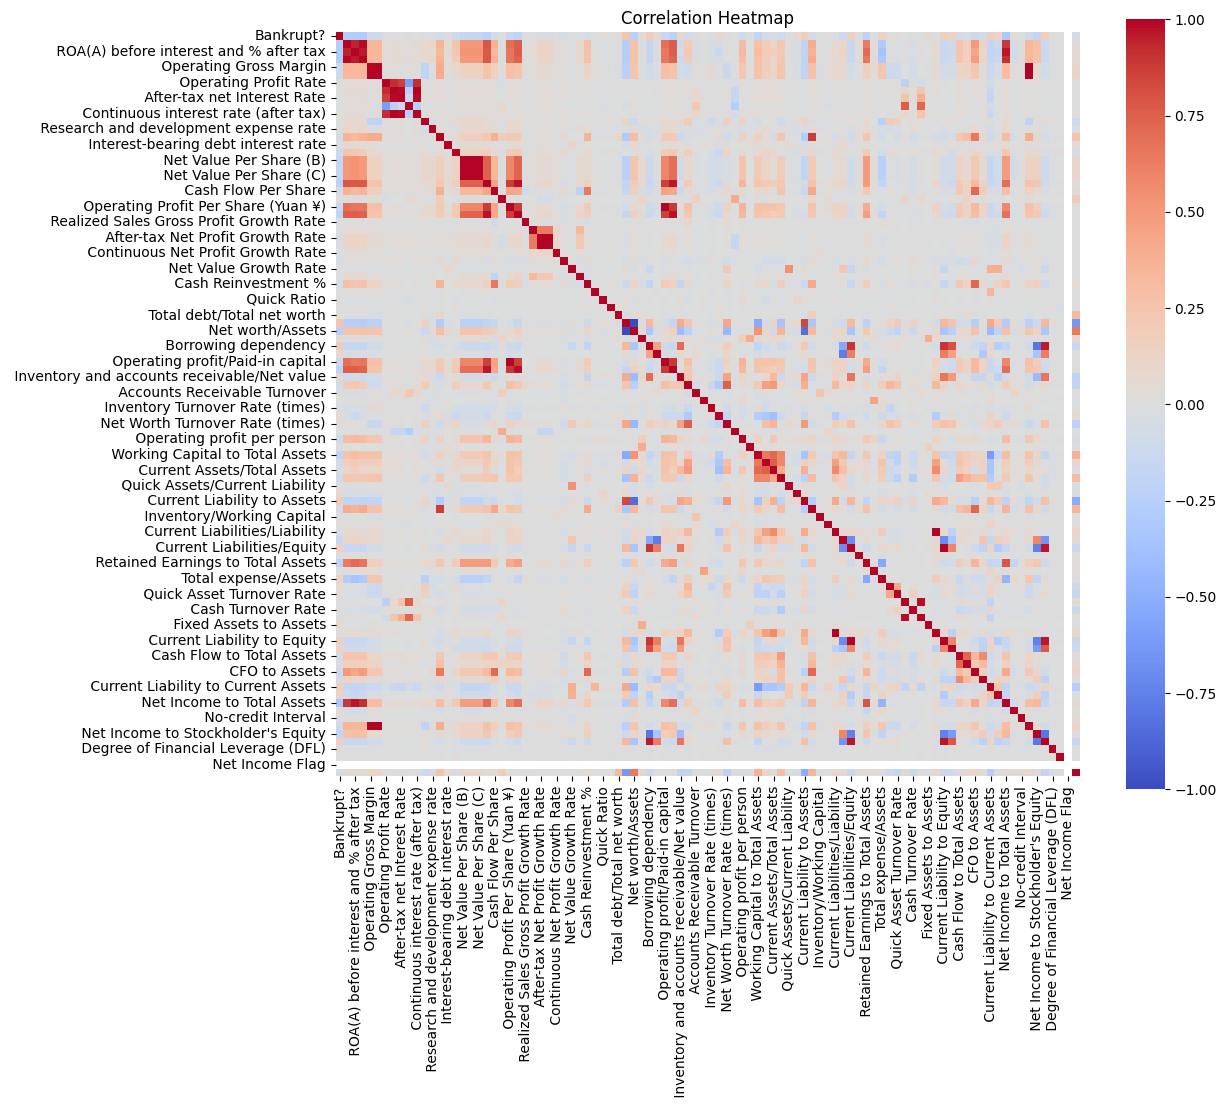

In [21]:
# Heating map of the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()

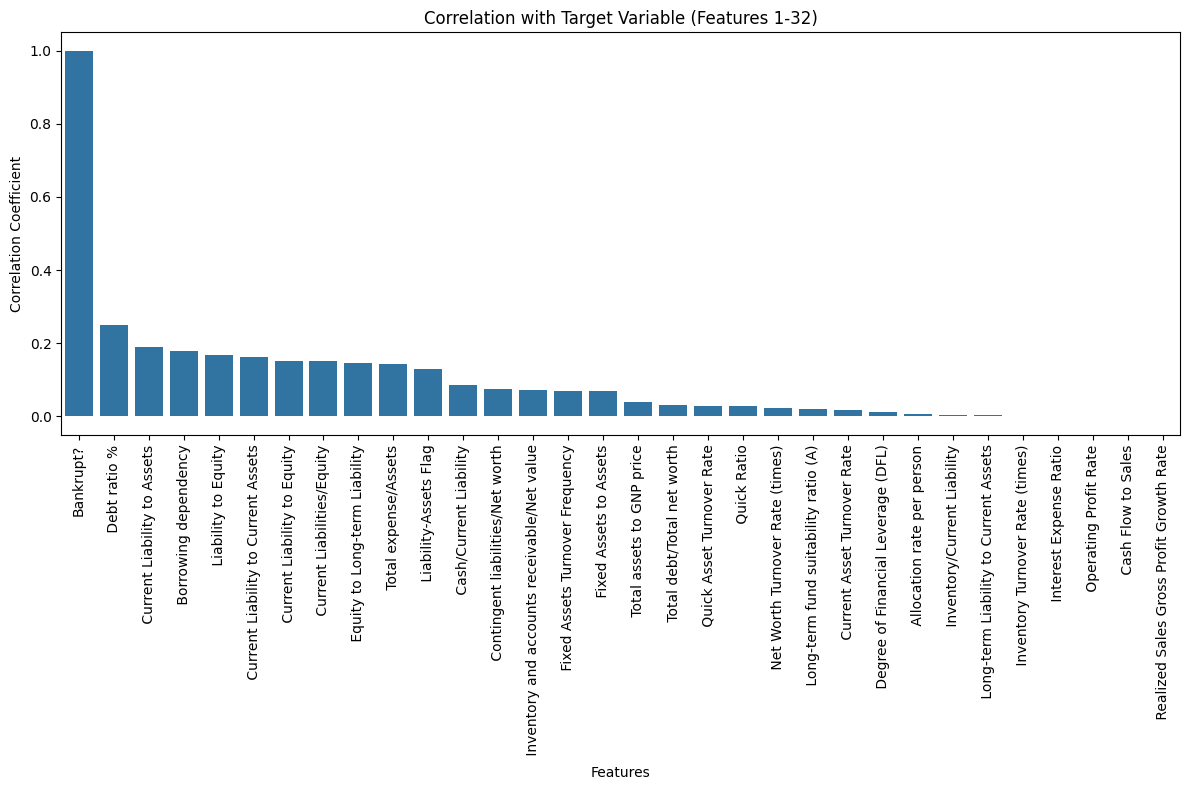

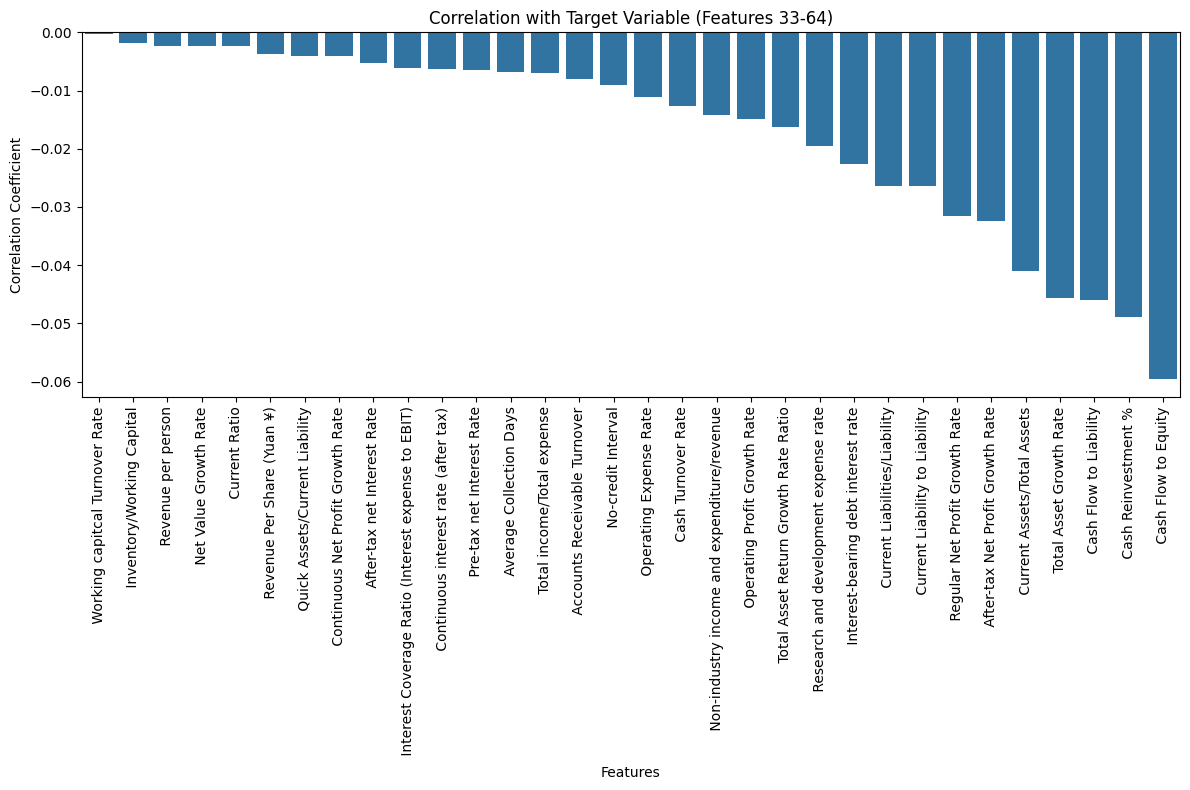

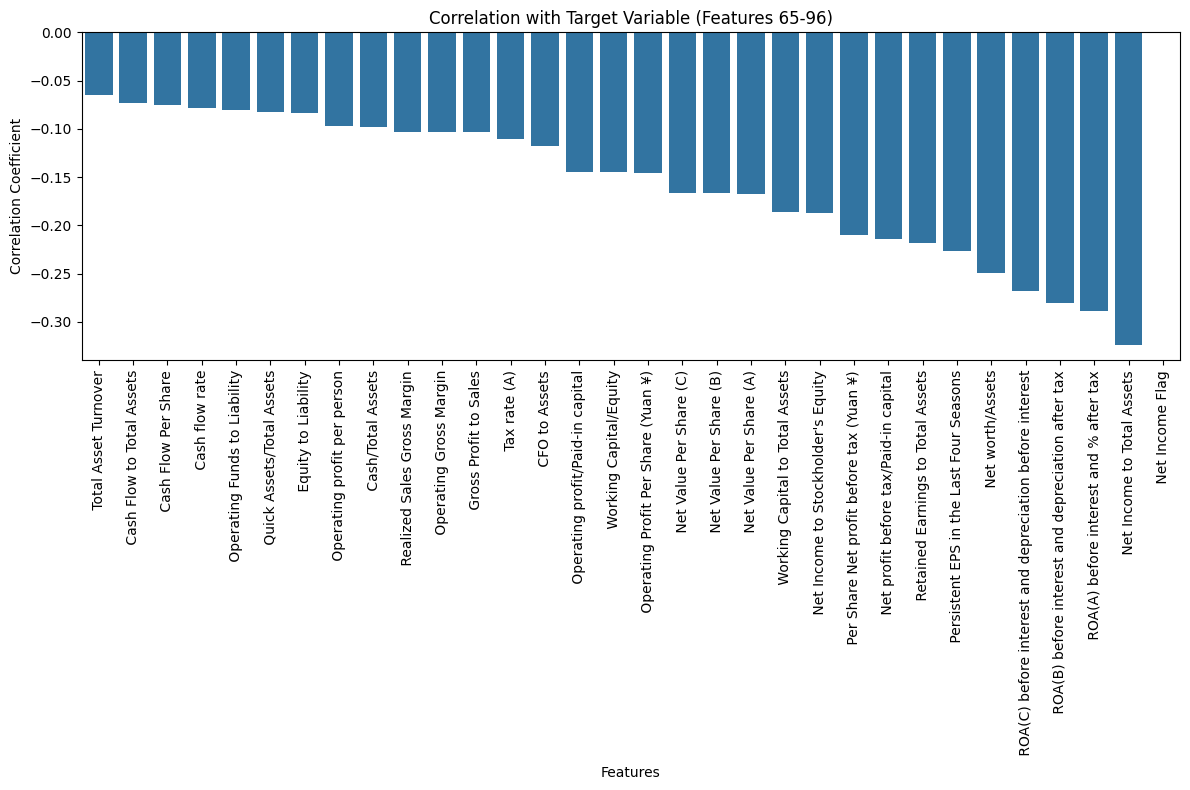

In [24]:
# Calculate the number of features per plot
n_features = len(target_correlation)
n_per_plot = n_features // 3
remainder = n_features % 3

# Plot the first group of features
plt.figure(figsize=(12, 8))
sns.barplot(x=target_correlation.index[:n_per_plot], y=target_correlation.values[:n_per_plot])
plt.xticks(rotation=90)
plt.title("Correlation with Target Variable (Features 1-{})".format(n_per_plot))
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()  # Ensures labels fit properly
plt.show()

# Plot the second group of features
plt.figure(figsize=(12, 8))
sns.barplot(x=target_correlation.index[n_per_plot:2*n_per_plot], 
            y=target_correlation.values[n_per_plot:2*n_per_plot])
plt.xticks(rotation=90)
plt.title("Correlation with Target Variable (Features {}-{})".format(n_per_plot+1, 2*n_per_plot))
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

# Plot the third group of features (including any remainder)
plt.figure(figsize=(12, 8))
sns.barplot(x=target_correlation.index[2*n_per_plot:], y=target_correlation.values[2*n_per_plot:])
plt.xticks(rotation=90)
plt.title("Correlation with Target Variable (Features {}-{})".format(2*n_per_plot+1, n_features))
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

In [25]:
# Show the values of the correlation matrix for the features and the target variable Bankrupt?
target_correlation = data.corr()['Bankrupt?'].sort_values(ascending=False)
print(target_correlation)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.249448
 Current Liability to Assets                                0.190205
 Borrowing dependency                                       0.177453
 Liability to Equity                                        0.167790
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.268327
 ROA(B) before interest and depreciation after tax         -0.280655
 ROA(A) before interest and % after tax                    -0.288803
 Net Income to Total Assets                                -0.323437
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64


### Correlation Graphs
The first graph shows that "Debt Ratio %" has the strongest positive correlation with bankruptcy (~0.25), followed by "Liability to Assets" and "Borrowing dependency" (around 0.2). This suggests higher debt and liability ratios are associated with increased bankruptcy risk.

The second graph shows features with small negative correlations to bankruptcy, with "Cash Flow to Equity" having the strongest negative correlation in this group.

The third graph displays the features with stronger negative correlations, with "Net Income to Total Assets Flag" having the strongest negative relationship (~-0.32) with bankruptcy. This indicates that companies with higher income relative to assets are less likely to go bankrupt.

These visualizations effectively identify which financial ratios are most strongly associated with bankruptcy risk in both directions.RetryClaude can make mistakes. Please double-check responses.

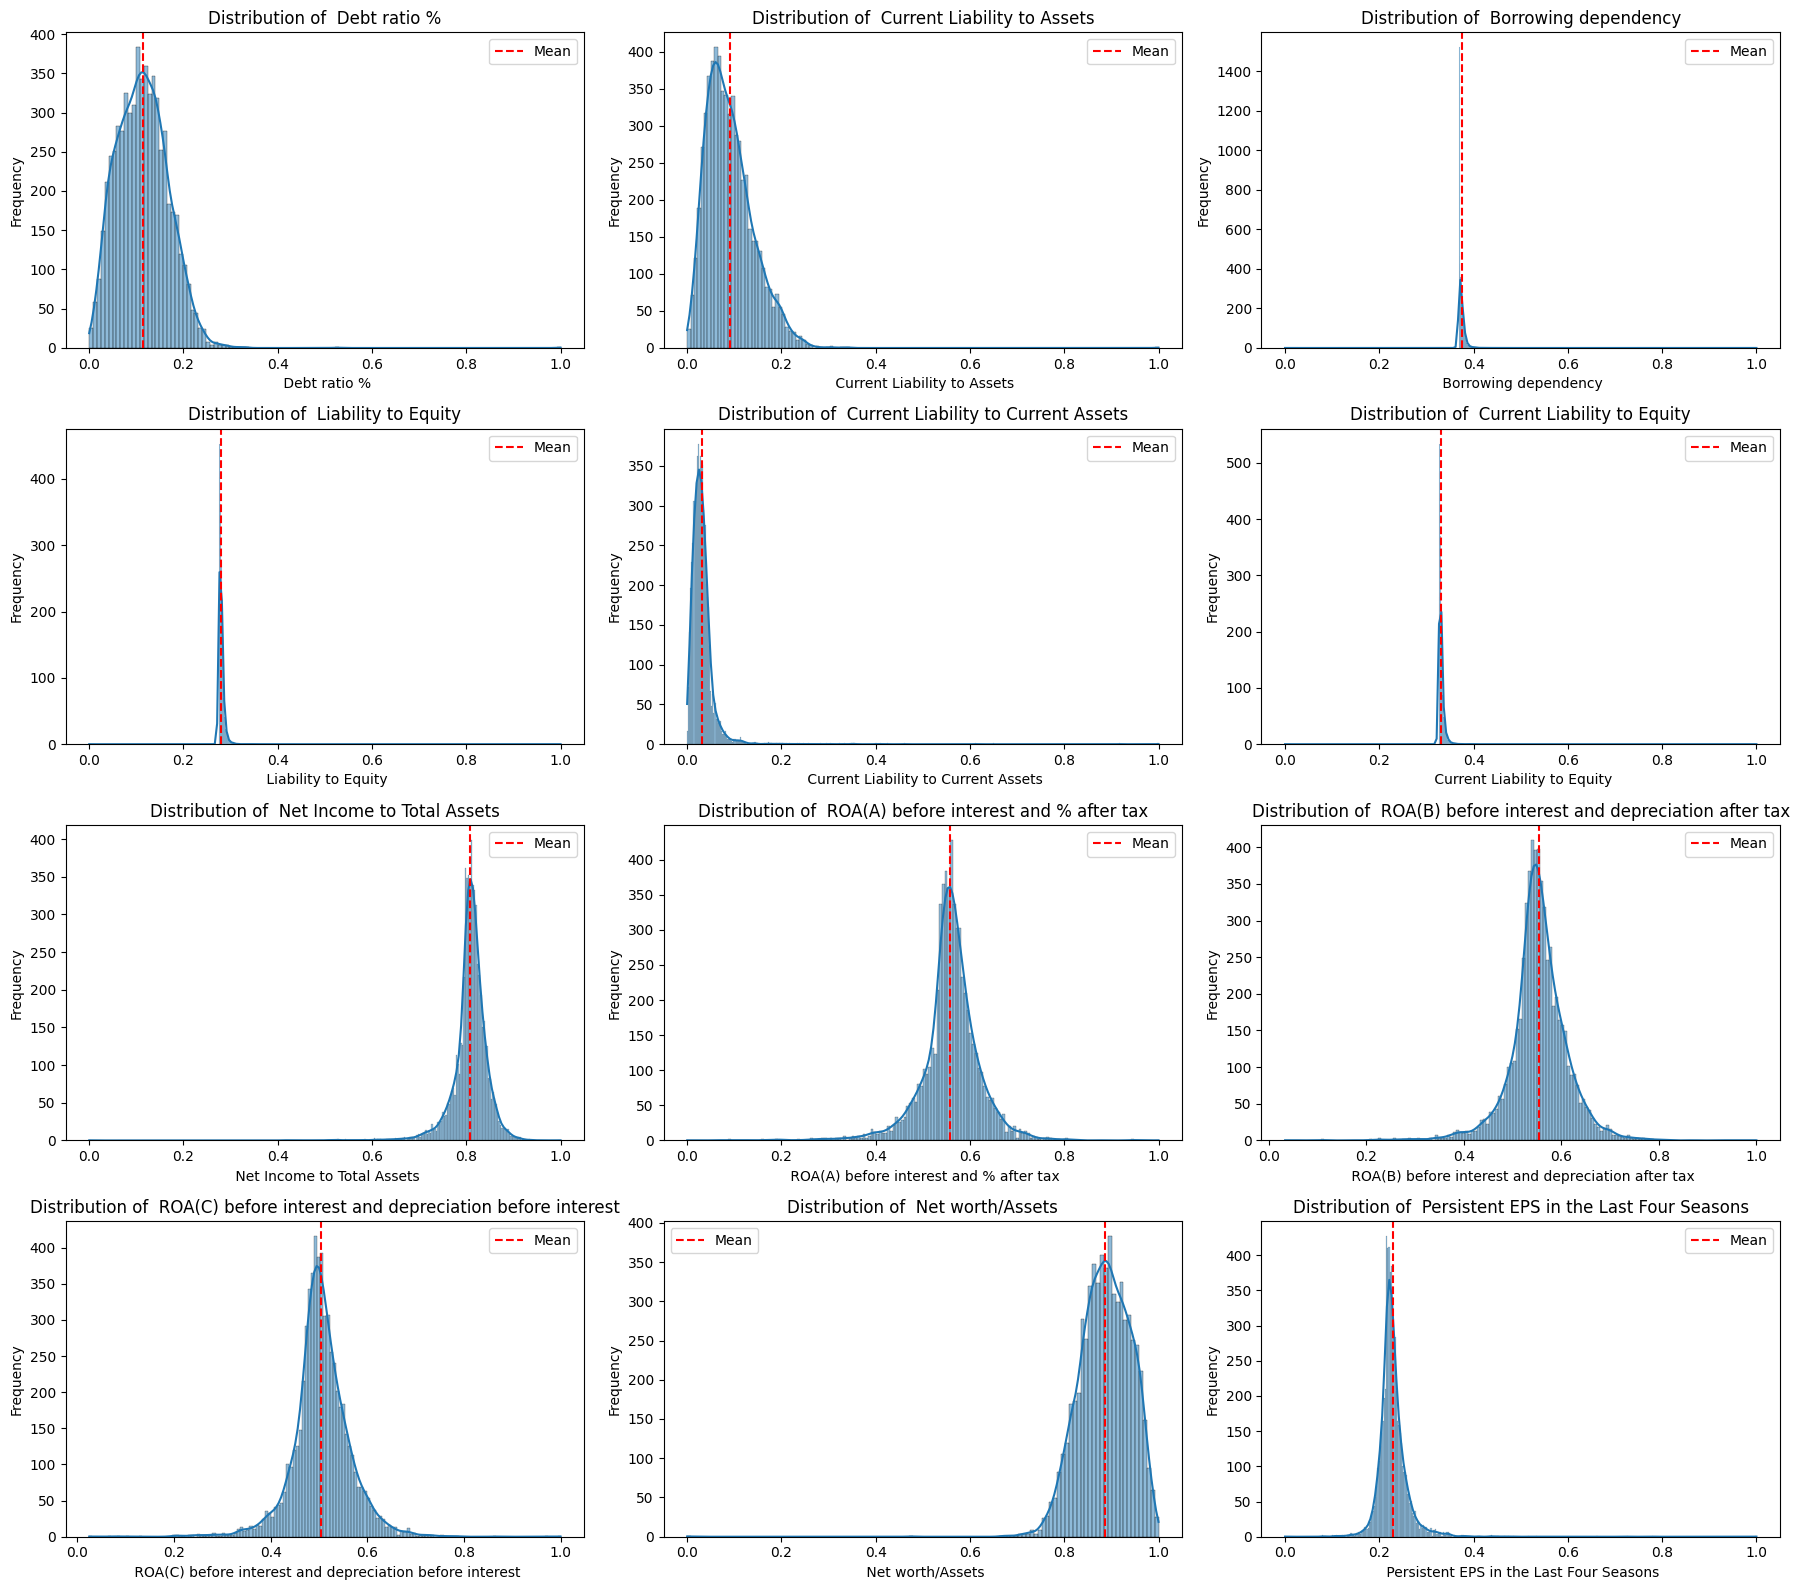

In [32]:
# 1. Distribution Analysis for Top Correlated Features
# Get the top 6 positively and negatively correlated features
pos_corr_features = target_correlation.sort_values(ascending=False)[1:7].index.tolist()  # Skip the target itself
neg_corr_features = target_correlation.sort_values()[0:6].index.tolist()
top_features = pos_corr_features + neg_corr_features

# Create a figure with subplots for each feature
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    # Plot histogram with KDE
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Add a vertical line for the mean
    axes[i].axvline(data[feature].mean(), color='r', linestyle='--', label='Mean')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Distribution Chart

**Debt-related metrics** (top row) show right-skewed distributions. Debt ratio %, Current Liability to Assets, and Borrowing dependency all have peaks at relatively low values (0.1-0.4 range) with long tails, suggesting most companies maintain moderate debt levels, while a smaller number have higher ratios.

**Liability metrics** (middle row) display very peaked distributions. Particularly, Liability to Equity and Current Liability to Equity have extremely concentrated distributions around specific values, indicating most companies maintain similar liability-to-equity ratios.

**Performance metrics** (bottom rows) show varied patterns:

- Net Income to Total Assets is heavily concentrated around 0.8, suggesting most companies in the dataset achieve similar profitability relative to assets.
- The ROA metrics (before interest and after tax/depreciation) are clustered around 0.5-0.6, with less variation.
- Net worth/Assets shows a distribution that peaks near 0.8-0.9, suggesting most companies maintain strong equity positions.
- Persistent EPS has a narrow distribution around 0.3, indicating consistency in earnings patterns.


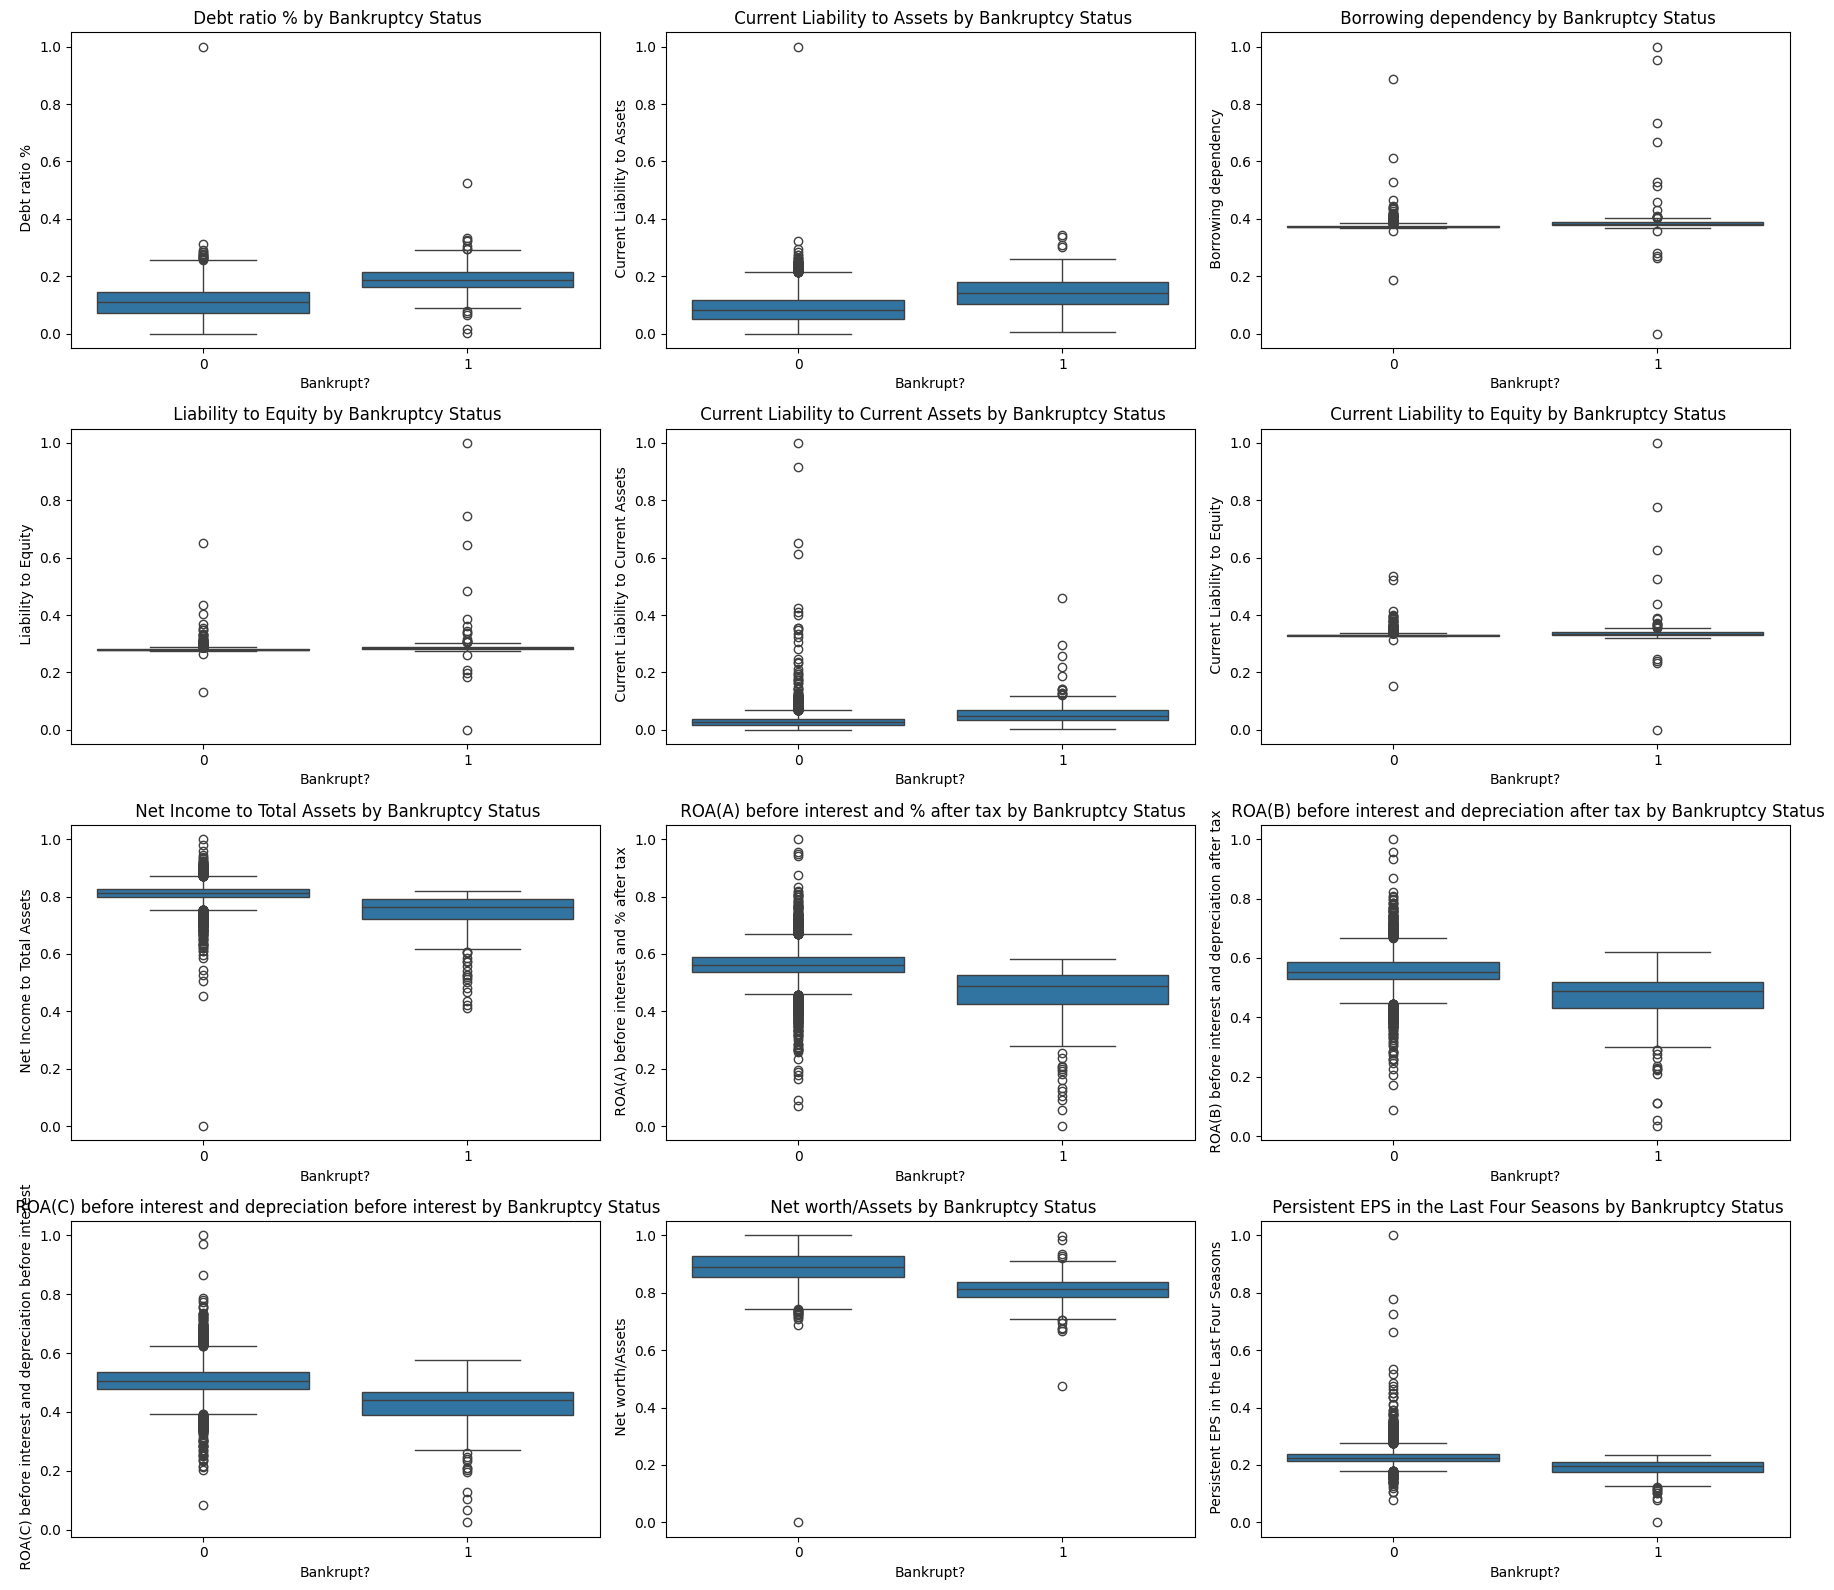

In [31]:
# Box Plots for comparing distributions between bankrupt and non-bankrupt companies
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    # Plot boxplot
    sns.boxplot(x='Bankrupt?', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} by Bankruptcy Status')
    axes[i].set_xlabel('Bankrupt?')
    axes[i].set_ylabel(feature)
    
    # Rotate x-axis labels if needed
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Box Plots

**Debt and Liability Metrics** (top two rows):

- Bankrupt companies (1) consistently show higher median values for Debt Ratio %, Current Liability to Assets, and Borrowing Dependency than non-bankrupt companies (0).
- The interquartile range (blue box) for debt measures is generally higher for bankrupt companies, suggesting greater variability.
- Several liability metrics show a similar pattern with bankrupt companies having higher median values, though the difference is less pronounced for Current Liability to Equity.


**Profitability Metrics** (middle and bottom rows):

- Net Income to Total Assets is notably lower for bankrupt companies, showing these companies generate less income relative to their assets.
- All ROA measures show consistently lower values for bankrupt companies.
- Net Worth/Assets appears higher for non-bankrupt companies, indicating healthier balance sheets.
- Persistent EPS in the Last Four Seasons is lower for bankrupt companies, suggesting weaker consistent earnings performance.

In [52]:
# Splitting the data into two sets: one for bankrupt companies and one for non-bankrupt companies
Not_Bankrupt_data = data[data["Bankrupt?"] == 0]
Bankrupt_data= data[data["Bankrupt?"] == 1]


(np.float64(0.937981172752017), np.float64(0.912923150852162))

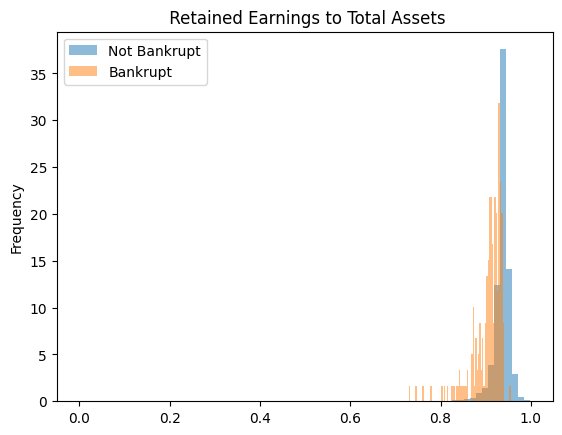

In [53]:
# Non-bankrupt companies tend to have a higher retained earning to total assets than bankrupt companies
# The median retained earnings to total assets for non-bankrupt companies is around 93% while bankrupt companies is around 91%
plt.title(" Retained Earnings to Total Assets")
Not_Bankrupt_data[" Retained Earnings to Total Assets"].plot(kind='hist', bins=75, alpha=0.5, density=True, label='Not Bankrupt')
Bankrupt_data[" Retained Earnings to Total Assets"].plot(kind='hist', bins=75, alpha=0.5, density=True, label='Bankrupt')
plt.legend()

Not_Bankrupt_data[" Retained Earnings to Total Assets"].median(), Bankrupt_data[" Retained Earnings to Total Assets"].median()

(np.float64(0.109562535901079), np.float64(0.187426308310911))

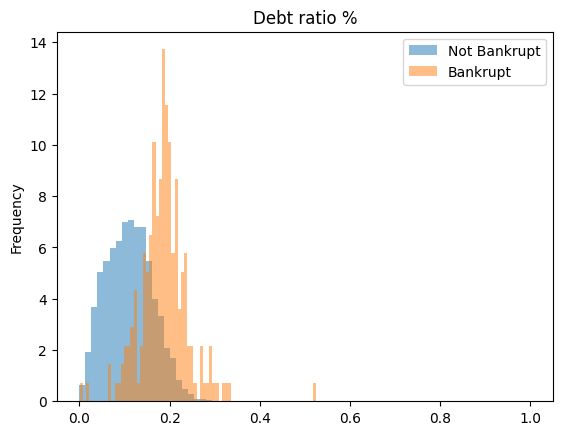

In [54]:
# Non-bankrupt companies tend to have a lower debt ratio than bankrupt companies
# The median retained earnings to total assets for non-bankrupt companies is around 11% while bankrupt companies is around 19%
plt.title('Debt ratio %')
Not_Bankrupt_data[" Debt ratio %"].plot(kind='hist', bins=75, alpha=0.5, density=True, label='Not Bankrupt')
Bankrupt_data[" Debt ratio %"].plot(kind='hist', bins=75, alpha=0.5, density=True, label='Bankrupt')
plt.legend()

Not_Bankrupt_data[" Debt ratio %"].median(), Bankrupt_data[" Debt ratio %"].median()

### Histograms

**Retained Earnings to Total Assets**:

- **Non-bankrupt companies** have a strong peak near **0.95**, indicating much higher levels of retained earnings relative to their total assets.
- **Bankrupt companies** show a broader spread, with values concentrated lower than non-bankrupt companies, although many still maintain relatively high ratios.
- The distribution for bankrupt companies is slightly shifted **left**, suggesting that lower retained earnings are associated with greater financial instability.

**Debt Ratio %**:

- **Bankrupt companies** tend to have **higher debt ratios**, with a distribution shifted **right** compared to non-bankrupt companies.
- **Non-bankrupt companies** are clustered around **lower debt ratios**, generally between **0.05 and 0.15**.
- The heavier right-tail for bankrupt companies indicates that **higher debt levels** are a consistent risk factor for bankruptcy.


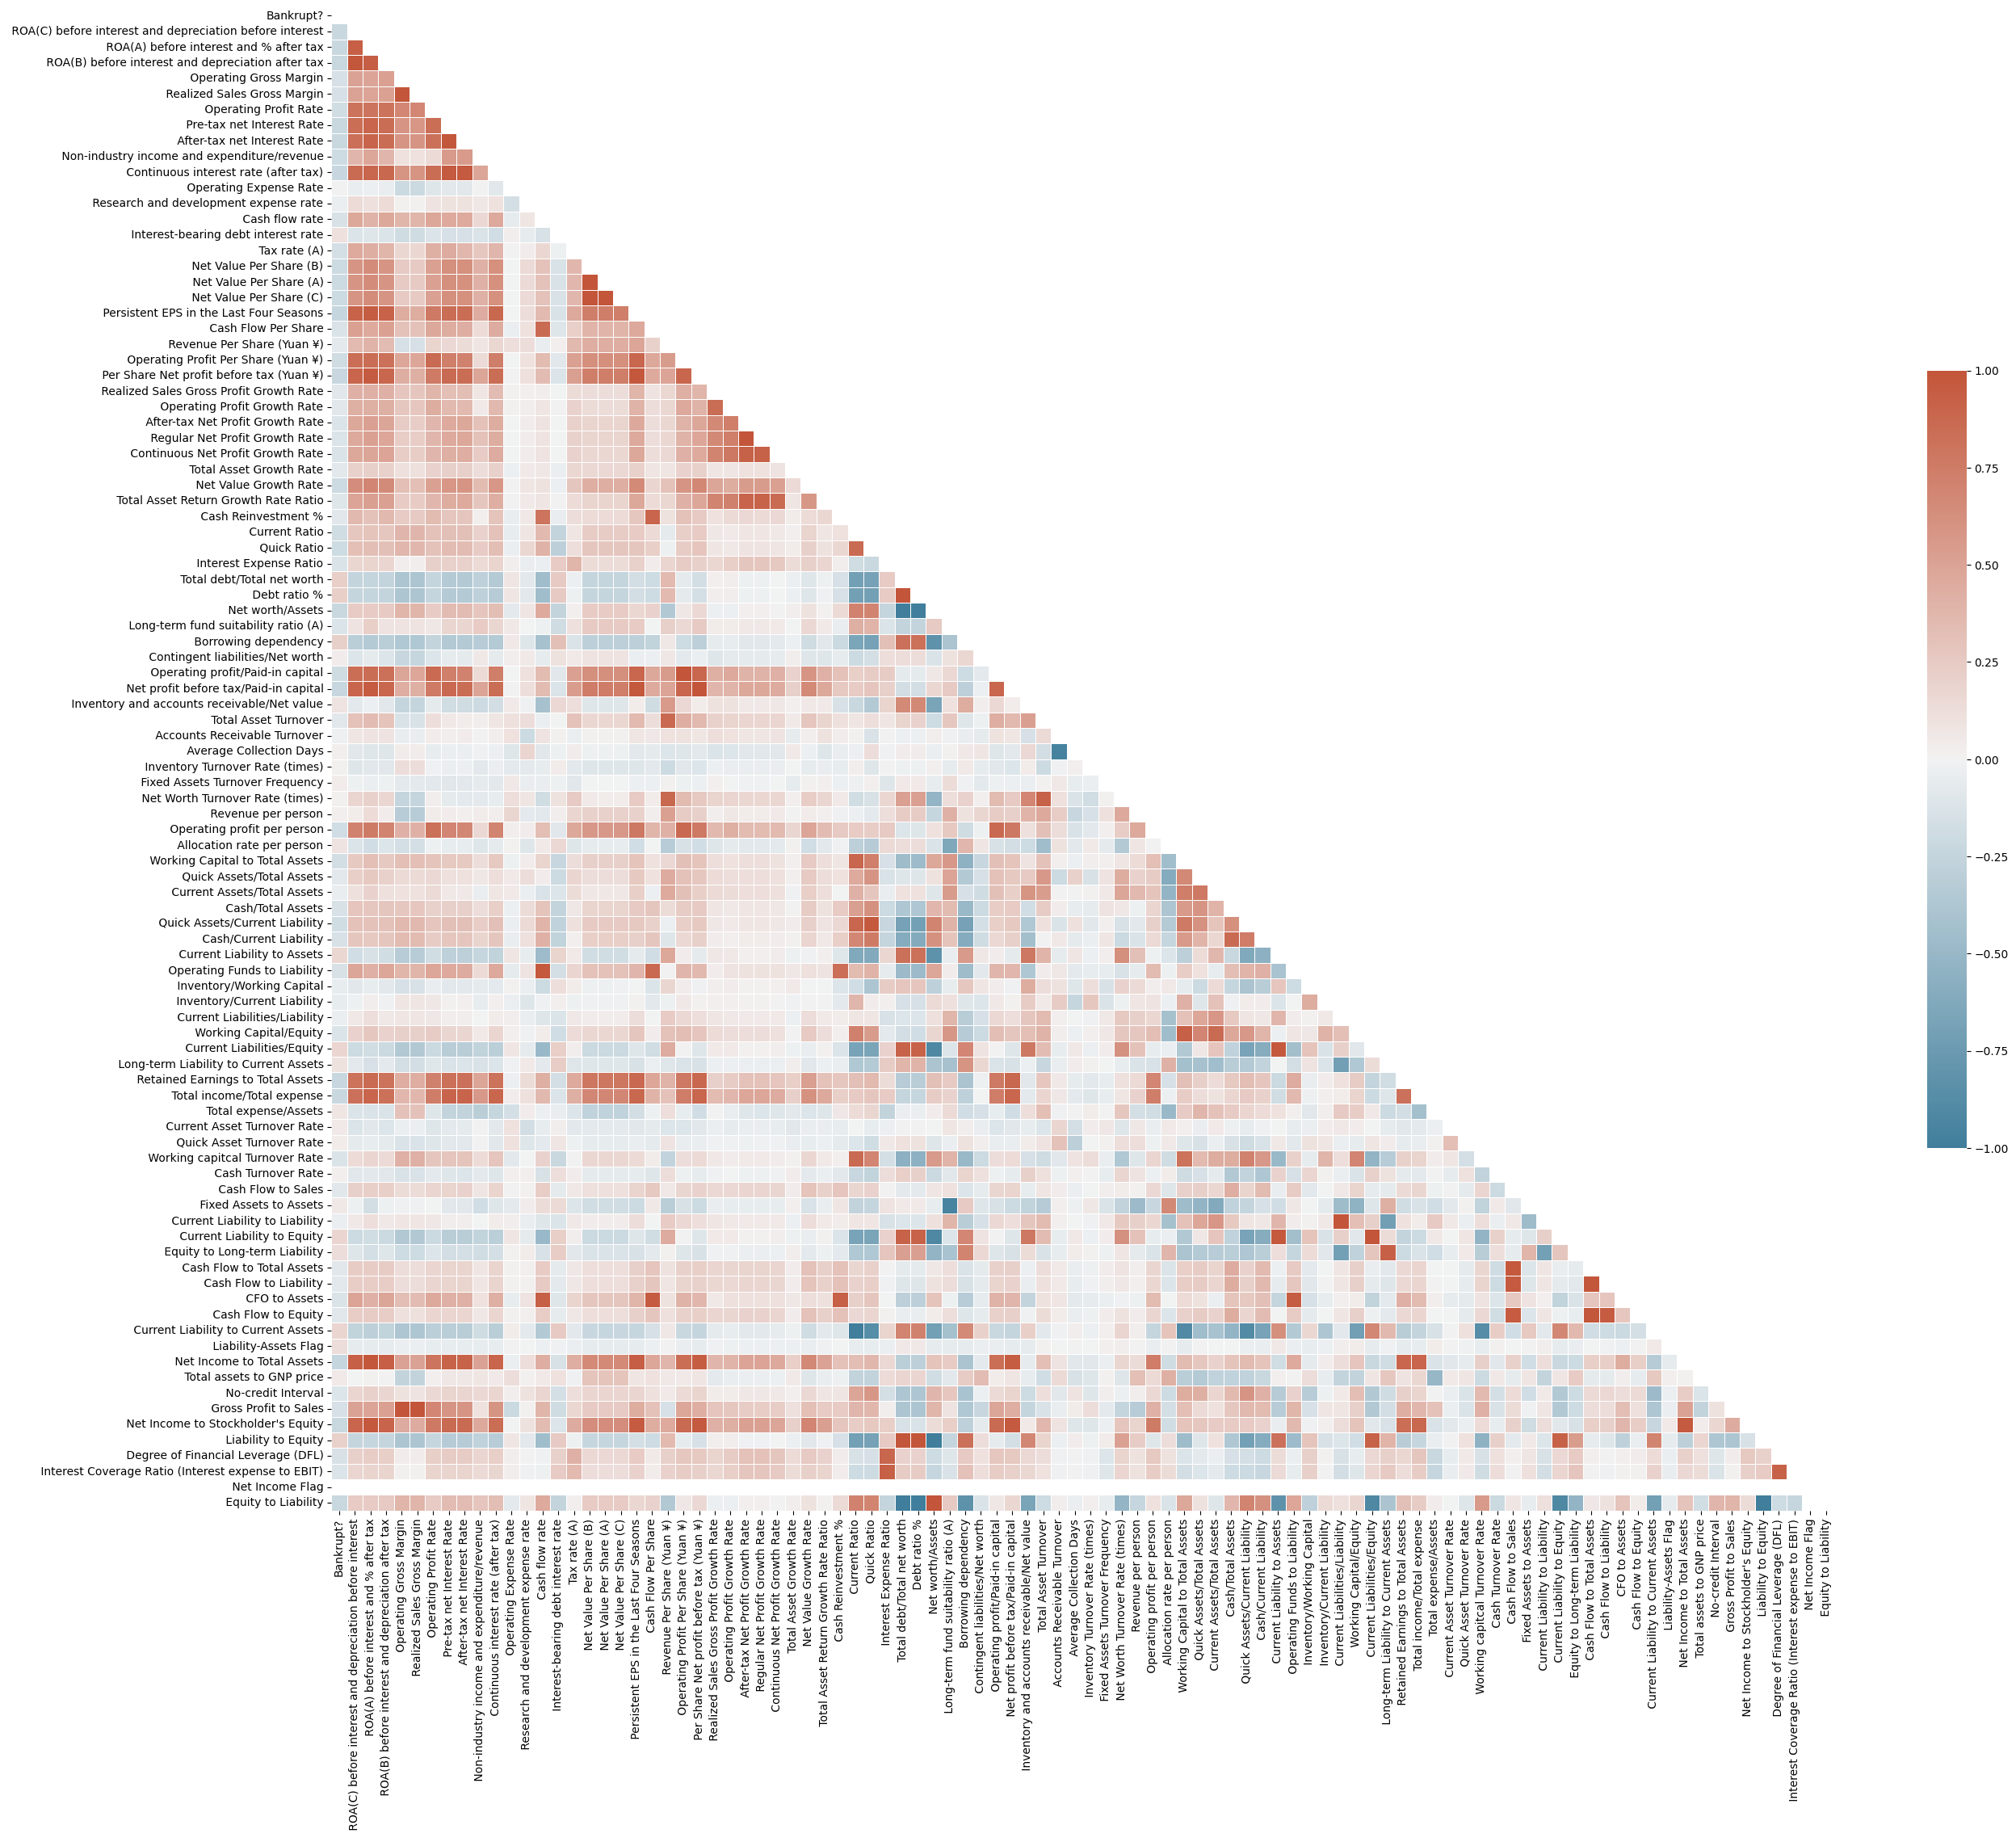

In [57]:
# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [10]:
copyBank = data.copy()

In [11]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in copyBank:
    BankOutRemove = outliers_removal(copyBank[col],str(col),copyBank)
    

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 198
-----------------------------------------------------------------
Quartile 25: 0.476575829961488 | Quartile 75: 0.535270316384732
iqr: 0.058694486423243986
Cut Off: 0.08804172963486598
 ROA(C) before interest and depreciation before interest Lower: 0.38853410032662206
 ROA(C) before interest and depreciation before interest Upper: 0.623312046019598
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 349
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.588802878325338
iqr: 0.053259921500217966
Cut Off: 0.07988988225032695
 ROA(A) before interest and % after tax Lower: 0.45565307457479304
 ROA(A) before interest and % after tax Upper: 0.668692760575665
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases

/var/folders/j5/1jwfhkkn49g1mdphywy5hrnr0000gp/T/ipykernel_48192/3415760828.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
/var/folders/j5/1jwfhkkn49g1mdphywy5hrnr0000gp/T/ipykernel_48192/3415760828.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

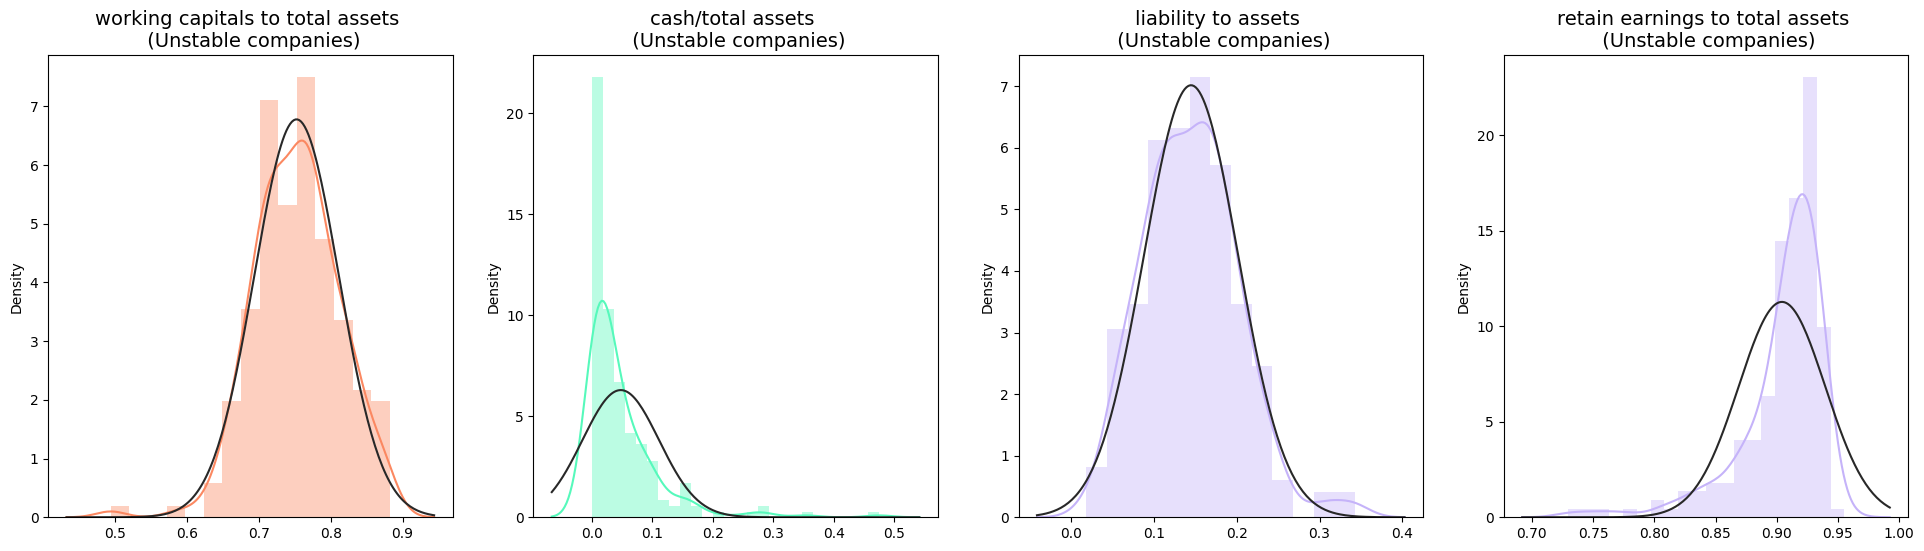

/var/folders/j5/1jwfhkkn49g1mdphywy5hrnr0000gp/T/ipykernel_48192/3415760828.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cash_flow_rate,ax=ax1, fit=norm , color='#FB8861')
/var/folders/j5/1jwfhkkn49g1mdphywy5hrnr0000gp/T/ipykernel_48192/3415760828.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

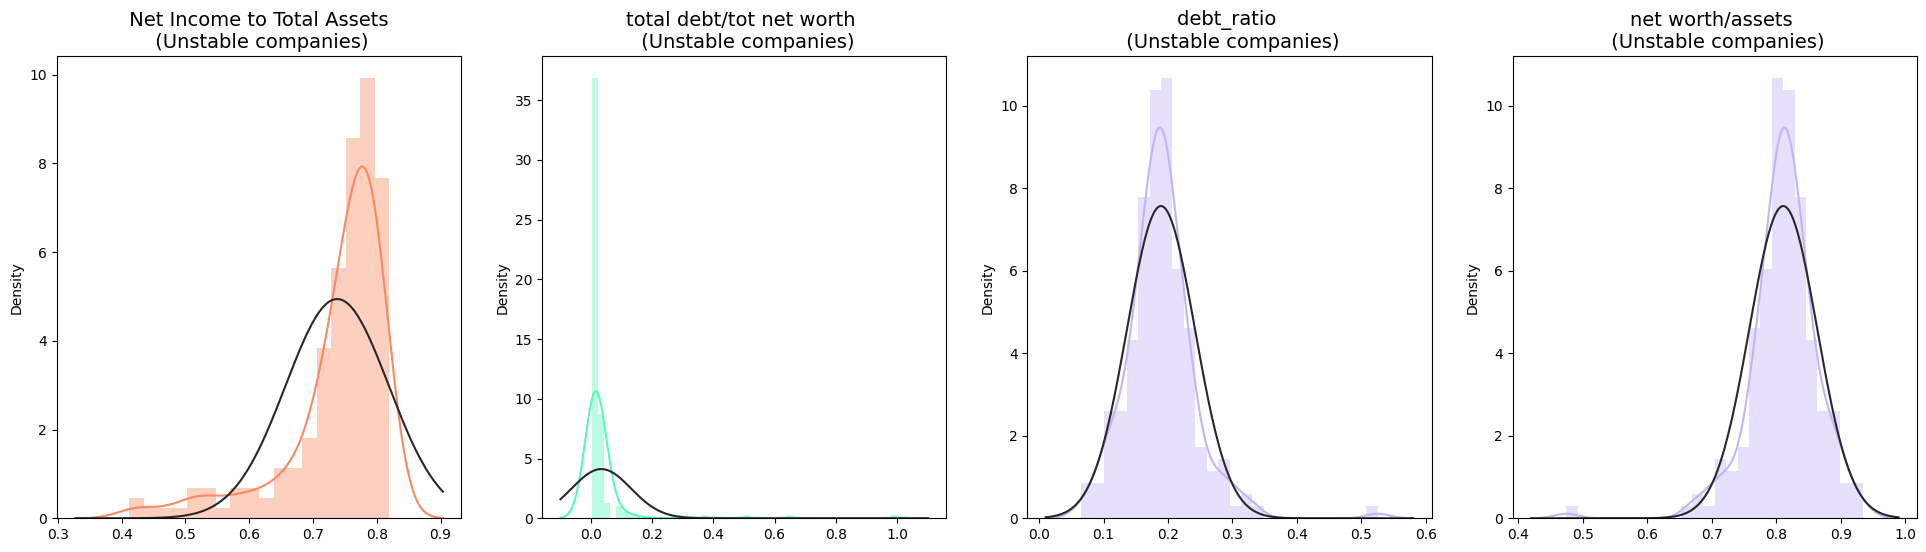

In [13]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = BankOutRemove[' Working Capital to Total Assets'].loc[BankOutRemove['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = BankOutRemove[' Cash/Total Assets'].loc[BankOutRemove['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = BankOutRemove[' Current Liability to Assets'].loc[BankOutRemove['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = BankOutRemove[' Retained Earnings to Total Assets'].loc[BankOutRemove['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = BankOutRemove[' Net Income to Total Assets'].loc[BankOutRemove['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm , color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = BankOutRemove[' Total debt/Total net worth'].loc[BankOutRemove['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = BankOutRemove[' Debt ratio %'].loc[BankOutRemove['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = BankOutRemove[' Net worth/Assets'].loc[BankOutRemove['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

### Density Plots

**Debt and Liability Metrics** (debt ratio, total debt/net worth, liability to assets):

- Unstable companies show **moderate debt ratios** (~0.2), with a roughly normal distribution.
- **Total debt to net worth** is highly **right-skewed**, indicating that while most unstable companies have low leverage, a few are highly indebted.
- **Liability to assets** also follows a near-normal distribution, centered around moderate values (~0.15–0.2), suggesting moderate risk exposure.

**Profitability and Stability Metrics** (net income to total assets, net worth/assets, retained earnings to total assets):

- **Net Income to Total Assets** is skewed slightly right, peaking between 0.7 and 0.8, indicating that many unstable companies still maintain moderate profitability.
- **Net Worth to Assets** and **Retained Earnings to Total Assets** are both heavily **left-skewed toward higher values** (0.8–0.9+), showing that many unstable companies maintain strong balance sheet equity despite instability.
- **Working Capital to Total Assets** shows an approximately normal distribution, with most companies clustered between 0.7 and 0.8, indicating relatively strong liquidity.
- **Cash to Total Assets** is highly **right-skewed**, suggesting that unstable companies often have **very limited cash reserves** relative to their total assets.


Prospective Feature Engineering
----

In [17]:
# Fix column names first
BankOutRemove.columns = BankOutRemove.columns.str.strip()

# Create Avg_ROA
BankOutRemove['Avg_ROA'] = (
    BankOutRemove['ROA(A) before interest and % after tax'] +
    BankOutRemove['ROA(B) before interest and depreciation after tax'] +
    BankOutRemove['ROA(C) before interest and depreciation before interest']
) / 3

# Drop redundant/highly correlated features
columns_to_drop = [
    'Realized Sales Gross Margin',
    'Operating Profit Rate',
    'Continuous interest rate (after tax)',
    'Net Value Per Share (B)',
    'Net Value Per Share (C)',
    'Persistent EPS in the Last Four Seasons',
    'Debt ratio %',
    'Operating Profit Per Share (Yuan ¥)',
    'Current Liability to Liability',
    'Current Liability to Equity',
    'Operating Gross Margin',
    'Liability to Equity'
]

BankOutRemove.drop(columns=columns_to_drop, inplace=True)

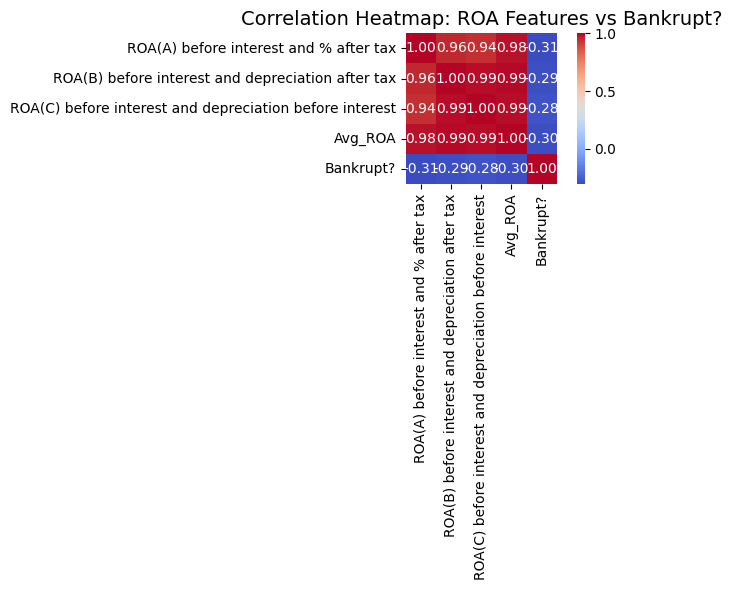

                                                    ROA(A) before interest and % after tax  \
ROA(A) before interest and % after tax                                            1.000000   
ROA(B) before interest and depreciation after tax                                 0.959055   
ROA(C) before interest and depreciation before ...                                0.942869   
Avg_ROA                                                                           0.980441   
Bankrupt?                                                                        -0.305273   

                                                    ROA(B) before interest and depreciation after tax  \
ROA(A) before interest and % after tax                                                       0.959055   
ROA(B) before interest and depreciation after tax                                            1.000000   
ROA(C) before interest and depreciation before ...                                           0.986393   
Avg_ROA        

In [21]:
# Select relevant columns
selected_features = BankOutRemove[
    ['ROA(A) before interest and % after tax',
     'ROA(B) before interest and depreciation after tax',
     'ROA(C) before interest and depreciation before interest',
     'Avg_ROA',
     'Bankrupt?']
]

# Compute correlation matrix
correlation_matrix = selected_features.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap: ROA Features vs Bankrupt?', fontsize=14)
plt.tight_layout()
plt.show()

# Display correlation matrix numerically
print(correlation_matrix)

### Correlation Heatmap: ROA Features vs Bankruptcy

**ROA Features**:

- All ROA metrics (ROA(A), ROA(B), ROA(C)) and Avg_ROA are **strongly positively correlated** with each other (correlations close to **0.99–1.00**), indicating they are closely related measures of company profitability.
- There is a **moderate negative correlation** between all ROA features and bankruptcy status (`Bankrupt?`), with values around **-0.28 to -0.31**.
- This suggests that **lower ROA values are associated with a higher likelihood of bankruptcy**, aligning with the idea that weaker profitability increases financial risk.


In [28]:
# Strip spaces from column names if you haven't already done this
BankOutRemove.columns = BankOutRemove.columns.str.strip()

# Create ratio: Borrowing burden relative to asset size
BankOutRemove['Borrowing_Burden_on_Size'] = BankOutRemove['Borrowing dependency'] / BankOutRemove['Total assets to GNP price']

# Log transform 'Total assets to GNP price'
BankOutRemove['Log_TotalAssets_GNP'] = np.log(BankOutRemove['Total assets to GNP price'] + 1e-6)

# Example: High Borrowing Dependency Flag
BankOutRemove['High_Borrowing_Flag'] = (BankOutRemove['Borrowing dependency'] > 0.7).astype(int)

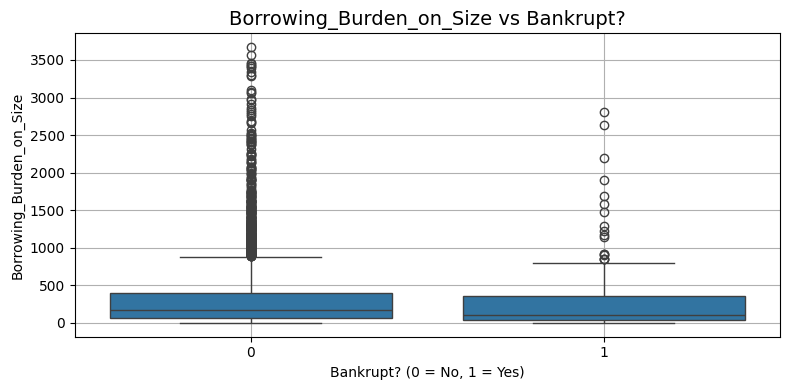

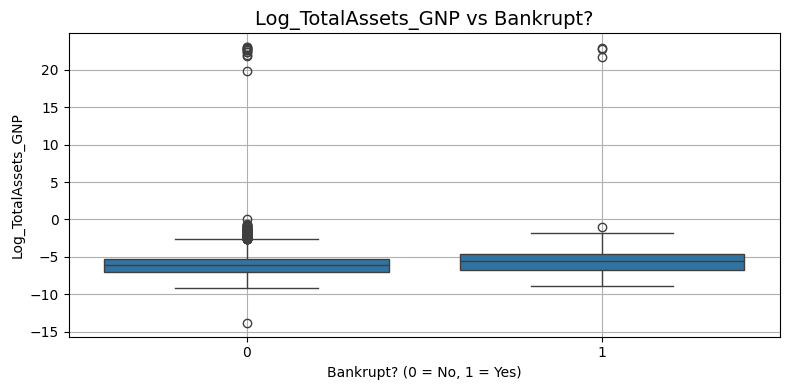

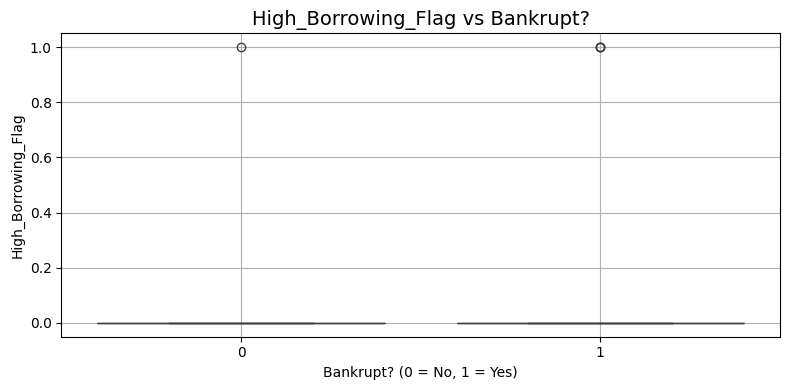

In [29]:
# Strip spaces first if not done (safe to run again)
BankOutRemove.columns = BankOutRemove.columns.str.strip()

# List of your new features
new_features = ['Borrowing_Burden_on_Size', 'Log_TotalAssets_GNP', 'High_Borrowing_Flag']

# Plot each new feature against the target
for feature in new_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=BankOutRemove, x='Bankrupt?', y=feature)
    plt.title(f'{feature} vs Bankrupt?', fontsize=14)
    plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

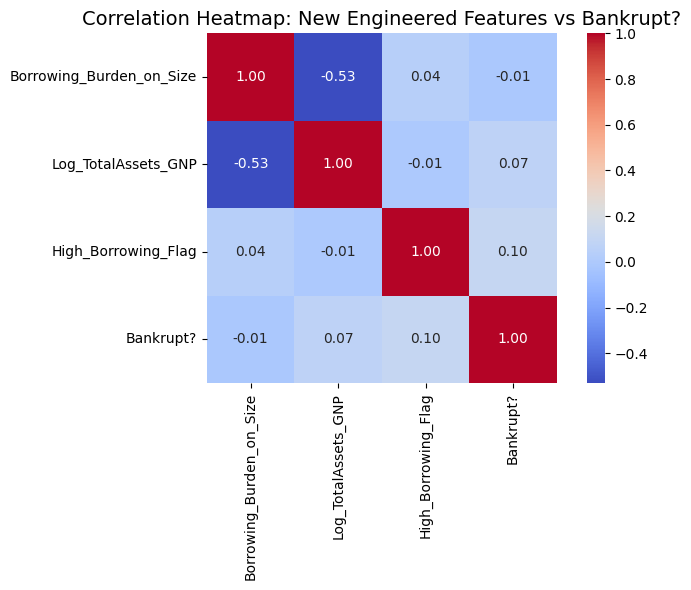

In [31]:
# Strip spaces from column names if not done (safe to re-run)
BankOutRemove.columns = BankOutRemove.columns.str.strip()

# Select only your new features + target
features_to_check = [
    'Borrowing_Burden_on_Size',
    'Log_TotalAssets_GNP',
    'High_Borrowing_Flag',
    'Bankrupt?'
]

# Compute correlation matrix
correlation_matrix = BankOutRemove[features_to_check].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap: New Engineered Features vs Bankrupt?', fontsize=14)
plt.tight_layout()
plt.show()

# Overall Data Exploration Summary

### Debt and Liability Metrics:
- **Bankrupt companies** consistently show higher debt ratios and higher borrowing dependence** compared to non-bankrupt companies.
- **Debt Ratio %** distributions are shifted right for bankrupt companies, indicating that higher leverage*is a major risk factor.
- **Total Debt to Net Worth** shows extreme skewness, highlighting a few unstable companies with very high debt loads relative to their net worth.
- **Liability to Assets** for unstable companies tends to be moderate but still indicates a higher liability burden compared to healthier companies.

### Profitability and Stability Metrics:
- **Net Income to Total Assets** and **Retained Earnings to Total Assets** are notably lower for bankrupt companies, suggesting weaker profitability and reduced accumulation of earnings.
- **Non-bankrupt companies** generally maintain higher retained earnings, higher working capital ratios, and higher net worth/assets percentages, supporting more robust financial health.
- Despite instability, many companies maintain relatively high levels of net worth and retained earnings, but cash reserves (Cash/Total Assets) are often limited.

### Correlation Analysis:
- **ROA (Return on Assets) features** show a moderate negative correlation (~-0.30) with bankruptcy. Lower ROA values are clearly linked with a higher risk of bankruptcy.

### Key Takeaways:
- **Higher debt burden** and **lower profitability** are consistently associated with bankruptcy across multiple measures.
- **Balance sheet strength** (especially net worth relative to assets and retained earnings) remains a critical differentiator between bankrupt and non-bankrupt companies.

Prepare The Data
----
1. **Data cleaning:** Fix/remove outliers (optional); Fill in missing values (with 0, mean,
median...) or drop rows/columns

2. **Feature selection:** Drop attributes that provide no useful information
for the task

3. **Feature engineering:** where appropriate: Discretize continuous features; Decompose features (categorical, date/time, ...),
Add promising transformations of features (log(𝑥𝑥), √𝑥𝑥, 𝑥𝑥 2, ...); Aggregate features into promising new features

4. **Feature scaling:** standardize or normalize features

In [12]:
# 1. Columns to drop
columns_to_drop = [
    'Realized Sales Gross Margin',
    'Operating Profit Rate',
    'Continuous interest rate (after tax)',
    'Net Value Per Share (B)',
    'Net Value Per Share (C)',
    'Persistent EPS in the Last Four Seasons',
    'Debt ratio %',
    'Operating Profit Per Share (Yuan ¥)',
    'Current Liability to Liability',
    'Current Liability to Equity',
    'Operating Gross Margin',
    'Liability to Equity'
]

# 2. Feature Engineering Transformer
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X.columns = X.columns.str.strip()
        # Create Avg_ROA
        X['Avg_ROA'] = (
            X['ROA(A) before interest and % after tax'] +
            X['ROA(B) before interest and depreciation after tax'] +
            X['ROA(C) before interest and depreciation before interest']
        ) / 3
        
        # Create Borrowing_Burden_on_Size
        X['Borrowing_Burden_on_Size'] = X['Borrowing dependency'] / (X['Total assets to GNP price'] + 1e-6)
        
        # Log transform Total assets to GNP price
        X['Log_TotalAssets_GNP'] = np.log(X['Total assets to GNP price'] + 1e-6)
        
        # High Borrowing Dependency Flag
        X['High_Borrowing_Flag'] = (X['Borrowing dependency'] > 0.7).astype(int)

        # ROA × Borrowing burden
        X['ROA_Borrowing_Interaction'] = X['Avg_ROA'] * X['Borrowing_Burden_on_Size']

        # Squared terms
        X['Avg_ROA_sq'] = X['Avg_ROA'] ** 2
        X['Borrowing_Burden_sq'] = X['Borrowing_Burden_on_Size'] ** 2

        # Low_Profit_Flag
        X['Low_Profit_Flag'] = (X['Avg_ROA'] < 0.02).astype(int)

        # High_Liquidity_Risk
        X['High_Liquidity_Risk'] = (X['Current Liability to Current Assets'] > 1.0).astype(int)

        # Firm size flags
        median_size = X['Total assets to GNP price'].median()
        X['Small_Firm_Flag'] = (X['Total assets to GNP price'] < 0.5 * median_size).astype(int)
        X['Large_Firm_Flag'] = (X['Total assets to GNP price'] > 2.0 * median_size).astype(int)

        return X

# 3. Smart Numerical Column Selector
class NumericalSelector(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.numeric_cols_ = X.select_dtypes(include=[np.number]).columns.tolist()
        return self
    
    def transform(self, X):
        return X[self.numeric_cols_]
    
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np


class OutlierRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=None, target_col='Bankrupt?'):
        """
        - features: list of columns to apply IQR-outlier removal to.
                    If None, will auto-detect continuous numerics.
        - target_col: name of your y-column to always exclude.
        """
        self.features = features
        self.target_col = target_col
        self.bounds_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        X.columns = X.columns.str.strip()
        # find all numeric columns
        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        # drop target and any binary/constant cols
        numeric_cols = [
            col for col in numeric_cols
            if col != self.target_col
            and X[col].nunique() > 2
        ]
        # if user provided explicit list, use that; else use auto list
        feats = self.features if self.features is not None else numeric_cols

        # compute IQR bounds
        for col in feats:
            q25, q75 = np.percentile(X[col], [25, 75])
            iqr = q75 - q25
            lower, upper = q25 - 1.5 * iqr, q75 + 1.5 * iqr
            self.bounds_[col] = (lower, upper)
        return self

    def transform(self, X):
        X = X.copy().reset_index(drop=True)
        X.columns = X.columns.str.strip()
        # drop any row outside bounds for each selected feature
        for col, (lower, upper) in self.bounds_.items():
            X = X[(X[col] >= lower) & (X[col] <= upper)]
        return X.reset_index(drop=True)

In [13]:
# Numerical pipeline (impute + scale)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessor using make_column_selector
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_pipeline, make_column_selector(dtype_include=[np.number])),
        ('drop', 'drop', columns_to_drop)
    ],
    remainder='passthrough'
)

# Final combined pipeline
pipeline = Pipeline([
    ('feature_engineering', FeatureEngineeringTransformer()),  # all your custom fe steps
    ('preprocessor',        preprocessor)                      # drops + numeric impute/scale
])


# 1) Separate X and y from your original DataFrame
X = train_set.drop(columns=['Bankrupt?'])
y = train_set['Bankrupt?']

# 2) Now fit/transform only X
X_t = pipeline.fit_transform(X)

# 3) Finally split into train/val
X_train_t, X_val_t, y_train, y_val = train_test_split(
    X_t, y, test_size=0.2, stratify=y, random_state=42
)

pipeline

Pipeline(steps=[('feature_engineering', FeatureEngineeringTransformer()),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1352ade20>),
                                                 ('drop', 'drop',
                                                  ['Realized Sales Gross '
                                                   'Margin',
                                                   'Operating Profit Rate',
                                                   'Continuous interest rate '
                                                   '(after tax)',
                                                   'Net Value Per Share (B)',
                                                   'Net Value Per Share (C)',
                                                   'Persistent EPS in the Last '
                                                   'Four Seasons',
                                                   'Debt ratio %',
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Current Liability to '
                                                   'Liability',
                                                   'Current Liability to '
                                                   'Equity',
                                                   'Operating Gross Margin',
                                                   'Liability to Equity'])]))])

## Short-List Promising Models

1. **Train many quick and dirty models from different categories** (e.g., linear, naive Bayes, SVM, Random Forests, neural net, ...) using standard parameters.

2. **Measure and compare their performance.** For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.

3. **Analyze the most significant variables for each algorithm.**
4. **Analyze the types of errors the models make.** What data would a human have used to avoid these errors?

5. **Have a quick round of feature selection and engineering.**

6. **Have one or two more quick iterations of the five previous steps.**

7. **Short-list the top three to five most promising models,** preferring models that make different types of errors.


In [18]:
%pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier  # just for comparison
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Keras imports
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [20]:
# 1) Define your candidate models
models = [
    ('LogReg', LogisticRegression(max_iter=1000, random_state=42)),
    ('RF',     RandomForestClassifier(n_estimators=100, random_state=42)),
    ('GB',     GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('AB',     AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('SVM',    SVC(kernel='rbf', probability=True, random_state=42)),
    ('MLP',    MLPClassifier(hidden_layer_sizes=(64,32), max_iter=200, random_state=42))
]

# 2) 5-fold stratified CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []
for name, clf in models:
    # build a small imblearn pipeline: SMOTE → classifier
    smote_pipe = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf',   clf)
    ])
    # cross‐validate on the already‐transformed train set
    rec = cross_val_score(
        smote_pipe,
        X_train_t,
        y_train,
        cv=cv,
        scoring='recall',
        n_jobs=-1
    )
    results.append((name, rec.mean(), rec.std()))

# tabulate
df = pd.DataFrame(results, columns=['Model','Mean Recall','STD Recall'])
print(df.sort_values('Mean Recall', ascending=False))

    Model  Mean Recall  STD Recall
0  LogReg     0.709879    0.099690
4     SVM     0.640121    0.087320
3      AB     0.613306    0.127571
2      GB     0.505847    0.051328
1      RF     0.385887    0.072276
5     MLP     0.304234    0.060256


In [30]:
%pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

# 1) Create a custom scikit-learn compatible wrapper
class KerasCustomClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, epochs=20, batch_size=32, verbose=0):
        self.input_dim = input_dim
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None
    
    def build_model(self):
        model = Sequential([
            Dense(64, activation='relu', input_shape=(self.input_dim,)),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['Recall'])
        return model
    
    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(
            X, y, 
            epochs=self.epochs, 
            batch_size=self.batch_size,
            verbose=self.verbose
        )
        return self
    
    def predict(self, X):
        preds = self.model.predict(X, verbose=0)
        return (preds > 0.5).astype(int).flatten()
    
    def predict_proba(self, X):
        preds = self.model.predict(X, verbose=0).flatten()
        return np.column_stack((1-preds, preds))
    
    def score(self, X, y):
        # Calculate recall manually
        y_pred = self.predict(X)
        true_positives = np.sum((y_pred == 1) & (y == 1))
        actual_positives = np.sum(y == 1)
        return true_positives / actual_positives if actual_positives > 0 else 0

# 2) Create an instance of the wrapper
keras_clf = KerasCustomClassifier(input_dim=X_train_t.shape[1])

# 3) Add to your models list
models.append(('KerasNN', keras_clf))

# 4) Evaluate with the same CV on Recall
recall_scores = cross_val_score(
    keras_clf,
    X_train_t,
    y_train,
    cv=cv,
    scoring='recall',
    n_jobs=1  # Important: set to 1 for Keras (threading issues)
)

# 5) Append to your results
results.append((
    'KerasNN',
    recall_scores.mean(),
    recall_scores.std()
))

# 6) Finally, view them all together
import pandas as pd
df = pd.DataFrame(results, columns=['Model','Mean Recall','STD Recall'])
print(df.sort_values('Mean Recall', ascending=False))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

     Model  Mean Recall  STD Recall
0   LogReg     0.709879    0.099690
4      SVM     0.640121    0.087320
3       AB     0.613306    0.127571
2       GB     0.505847    0.051328
1       RF     0.385887    0.072276
5      MLP     0.304234    0.060256
6  KerasNN     0.183468    0.036060


## Fine-Tune the System

1. **Fine-tune the hyperparameters using cross-validation.** Treat your data transformation choices as hyperparameters, especially when you are not sure about them. Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach.

2. **Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.**

In [42]:
import numpy as np
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Dictionary to store best models and their scores
best_models = {}

# 1) Logistic regression with Bayesian Optimization
print("Tuning Logistic Regression with Bayesian Optimization...")
logreg_search_space = {
    'C': Real(1e-4, 1e4, 'log-uniform'),
    'solver': Categorical(['liblinear', 'saga']),
    'max_iter': Integer(100, 1000),
    'penalty': Categorical(['l1', 'l2']),
    'class_weight': Categorical([None, 'balanced'])
}
bayes_search_logreg = BayesSearchCV(
    LogisticRegression(random_state=42),
    logreg_search_space,
    n_iter=15,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
bayes_search_logreg.fit(X_train_t, y_train)
best_models['LogReg_Tuned'] = bayes_search_logreg.best_estimator_
print(f"Best Logistic Regression parameters: {bayes_search_logreg.best_params_}")
print(f"Best Logistic Regression recall: {bayes_search_logreg.best_score_:.4f}")

# 2) AdaBoost with Bayesian Optimization
print("Tuning AdaBoost with Bayesian Optimization...")
ab_search_space = {
    'n_estimators': Integer(50, 300),
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'algorithm': Categorical(['SAMME'])  # Only using SAMME which is compatible
}

bayes_search_ab = BayesSearchCV(
    AdaBoostClassifier(random_state=42),
    ab_search_space,
    n_iter=15,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
bayes_search_ab.fit(X_train_t, y_train)
best_models['AB_Tuned'] = bayes_search_ab.best_estimator_
print(f"Best AdaBoost parameters: {bayes_search_ab.best_params_}")
print(f"Best AdaBoost recall: {bayes_search_ab.best_score_:.4f}")

# 3) MLP with Bayesian Optimization - FIXED FOR HIDDEN LAYERS
# We'll handle MLPClassifier differently to avoid the error
print("Tuning MLP with Bayesian Optimization...")

# Create different MLPClassifier instances with different hidden layer sizes
mlp_models = []
hidden_layers = [(50,), (100,), (50, 25), (100, 50), (100, 50, 25)]

for hl in hidden_layers:
    # For each hidden layer configuration, do Bayesian search on other parameters
    mlp_search_space = {
        'activation': Categorical(['tanh', 'relu']),
        'solver': Categorical(['adam']),
        'alpha': Real(0.0001, 0.01, 'log-uniform'),
        'learning_rate': Categorical(['constant', 'adaptive']),
        'max_iter': Integer(500, 1500)
    }
    
    mlp = MLPClassifier(hidden_layer_sizes=hl, random_state=42)
    bayes_search = BayesSearchCV(
        mlp,
        mlp_search_space,
        n_iter=5,  # Fewer iterations per hidden layer size
        cv=3,
        scoring='recall',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    print(f"Fitting MLP with hidden layers {hl}")
    bayes_search.fit(X_train_t, y_train)
    mlp_models.append((bayes_search.best_estimator_, bayes_search.best_score_))
    print(f"Best score for hidden layers {hl}: {bayes_search.best_score_:.4f}")

# Find the best MLP model overall
best_mlp_model, best_mlp_score = max(mlp_models, key=lambda x: x[1])
best_models['MLP_Tuned'] = best_mlp_model
print(f"Best MLP hidden layers: {best_mlp_model.hidden_layer_sizes}")
print(f"Best MLP recall: {best_mlp_score:.4f}")

# Add all the best tuned models to the results
tuned_results = []
for name, model in best_models.items():
    # Get the training score
    train_score = model.score(X_train_t, y_train)
    
    # Get a validation score
    from sklearn.model_selection import cross_val_score
    val_scores = cross_val_score(
        model, X_train_t, y_train, cv=3, scoring='recall', n_jobs=-1
    )
    val_score = val_scores.mean()
    
    tuned_results.append((
        name,
        train_score,
        val_score
    ))

# Display all results
import pandas as pd
df_final = pd.DataFrame(tuned_results, columns=['Model', 'Train Recall', 'Val Recall'])
print(df_final.sort_values('Val Recall', ascending=False))

Tuning Logistic Regression with Bayesian Optimization...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The

Best Logistic Regression parameters: OrderedDict({'C': 0.5337382943908665, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'})
Best Logistic Regression recall: 0.8350
Tuning AdaBoost with Bayesian Optimization...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.

Best AdaBoost parameters: OrderedDict({'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50})
Best AdaBoost recall: 0.1961
Tuning MLP with Bayesian Optimization...
Fitting MLP with hidden layers (50,)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best score for hidden layers (50,): 0.3162
Fitting MLP with hidden layers (100,)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best score for hidden layers (100,): 0.2843
Fitting MLP with hidden layers (50, 25)
Fitting 3 folds for each of 1 cand

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_we

          Model  Train Recall  Val Recall
0  LogReg_Tuned      0.854757    0.835027
2     MLP_Tuned      0.999796    0.316159
1      AB_Tuned      0.967814    0.196057


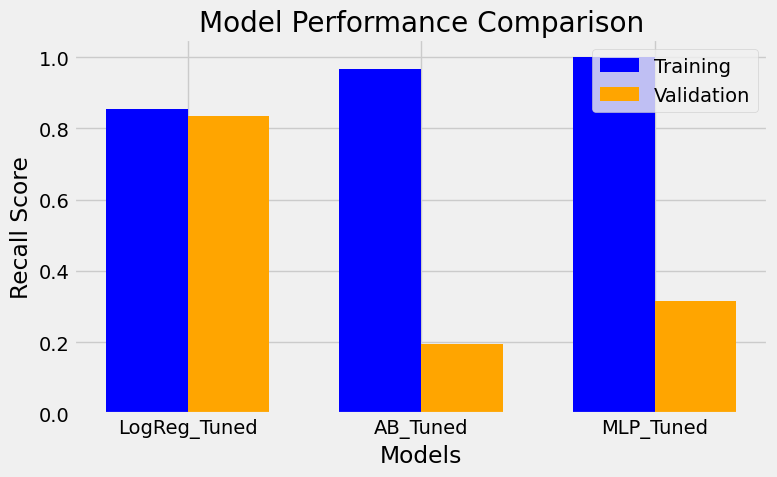

LogReg model details:


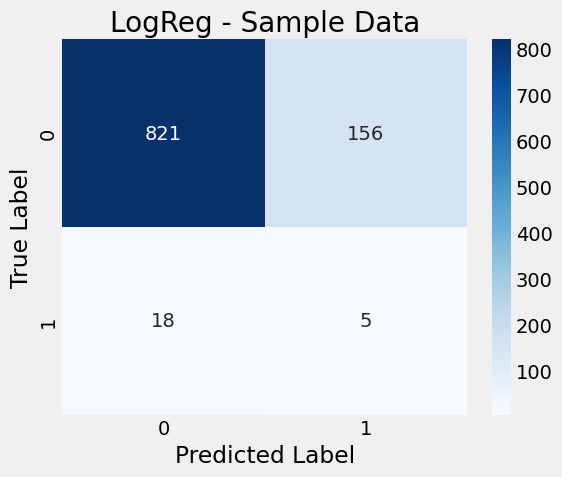

LogReg - Sample Data Metrics:
True Positives: 5
False Positives: 156
True Negatives: 821
False Negatives: 18
Recall: 0.2174
Precision: 0.0311
Accuracy: 0.8260


Top 10 important features:
1. Feature_36: 0.537358
2. Feature_37: -0.537358
3. Feature_18: -0.331960
4. Feature_43: -0.313786
5. Feature_73: -0.303952
6. Feature_56: -0.271246
7. Feature_85: -0.264039
8. Feature_49: -0.255691
9. Feature_45: -0.246913
10. Feature_59: 0.246766


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot a single confusion matrix
def simple_confusion_matrix(model, X, y, title):
    try:
        # Make predictions
        y_pred = model.predict(X)
        
        # Create confusion matrix
        cm = confusion_matrix(y, y_pred)
        
        # Plot
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(title)
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()
        
        # Print metrics
        tn, fp, fn, tp = cm.ravel()
        print(f"{title} Metrics:")
        print(f"True Positives: {tp}")
        print(f"False Positives: {fp}")
        print(f"True Negatives: {tn}")
        print(f"False Negatives: {fn}")
        print(f"Recall: {tp / (tp + fn) if (tp + fn) > 0 else 0:.4f}")
        print(f"Precision: {tp / (tp + fp) if (tp + fp) > 0 else 0:.4f}")
        print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.4f}")
        print("\n")
        
    except Exception as e:
        print(f"Error plotting confusion matrix: {e}")

# Function to print top features for logistic regression
def print_logreg_features(model, feature_names=None, top_n=10):
    try:
        if not hasattr(model, 'coef_'):
            print("Model doesn't have coefficients to examine")
            return
            
        # Get feature importance
        coefficients = model.coef_[0]
        
        # Create feature names if not provided
        if feature_names is None:
            feature_names = [f"Feature_{i}" for i in range(len(coefficients))]
            
        # Sort by absolute value
        importance = np.abs(coefficients)
        indices = np.argsort(importance)[::-1]
        
        print(f"Top {top_n} important features:")
        for i in range(min(top_n, len(indices))):
            idx = indices[i]
            print(f"{i+1}. {feature_names[idx]}: {coefficients[idx]:.6f}")
        
    except Exception as e:
        print(f"Error printing features: {e}")

# Simple function to visualize a bar chart of model performance
def simple_bar_chart(model_names, train_scores, val_scores):
    try:
        x = np.arange(len(model_names))
        width = 0.35
        
        plt.figure(figsize=(8, 5))
        plt.bar(x - width/2, train_scores, width, label='Training', color='blue')
        plt.bar(x + width/2, val_scores, width, label='Validation', color='orange')
        
        plt.xlabel('Models')
        plt.ylabel('Recall Score')
        plt.title('Model Performance Comparison')
        plt.xticks(x, model_names)
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting bar chart: {e}")

# 1. Model comparison bar chart
model_names = ['LogReg_Tuned', 'AB_Tuned', 'MLP_Tuned']
train_scores = [0.854757, 0.967814, 0.999796]
val_scores = [0.835027, 0.196057, 0.316159]

simple_bar_chart(model_names, train_scores, val_scores)

# 2. For the best model (LogReg), print some info and plot confusion matrix
try:
    logreg_model = best_models.get('LogReg_Tuned')
    if logreg_model is not None:
        # Use a small sample for testing to avoid memory issues
        X_sample = X_train_t[:1000] if len(X_train_t) > 1000 else X_train_t
        y_sample = y_train[:1000] if len(y_train) > 1000 else y_train
        
        print("LogReg model details:")
        simple_confusion_matrix(logreg_model, X_sample, y_sample, "LogReg - Sample Data")
        
        # Get feature names if available
        if hasattr(X_train_t, 'columns'):
            feature_names = list(X_train_t.columns)
        else:
            feature_names = [f"Feature_{i}" for i in range(X_train_t.shape[1])]
            
        print_logreg_features(logreg_model, feature_names)
    else:
        print("LogReg model not found in best_models dictionary")
except Exception as e:
    print(f"Error analyzing LogReg model: {e}")

# Present your solution 